### HR Analytics: Job Change of Data Scientists——Predict who will move to a new job    
enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

last_new_job: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [97]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder,PowerTransformer,MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE,ADASYN, SVMSMOTE
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
from sklearn.compose import make_column_transformer
#import category_encoders as ce
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# Load data
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ML project/aug1_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ML project/aug_test.csv')

In [100]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [101]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19155 entries, 0 to 19154
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19155 non-null  int64  
 1   city                    19155 non-null  object 
 2   city_development_index  19155 non-null  float64
 3   gender                  14647 non-null  object 
 4   relevent_experience     19155 non-null  object 
 5   enrolled_university     18769 non-null  object 
 6   education_level         18695 non-null  object 
 7   major_discipline        16342 non-null  object 
 8   experience              19090 non-null  object 
 9   company_size            13218 non-null  object 
 10  company_type            13016 non-null  object 
 11  last_new_job            18732 non-null  object 
 12  training_hours          19155 non-null  int64  
 13  target                  19155 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [103]:
print(df_train.shape)
print(df_train['relevent_experience'].unique())
print(df_train['enrolled_university'].unique())
print(df_train['education_level'].unique())
print(df_train['major_discipline'].unique())
print(df_train['experience'].unique())
print(df_train['company_size'].unique())
print(df_train['company_type'].unique())
print(df_train['last_new_job'].unique())

(19155, 14)
['Has relevent experience' 'No relevent experience']
['no_enrollment' 'Full time course' nan 'Part time course']
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' 'Oct-49' '100-500'
 '500-999']
[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
['1' '>4' 'never' '4' '3' '2' nan]


In [104]:
df_train['company_size'] = df_train['company_size'].replace('10/49', '10-49')
df_train['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
Oct-49       1471
1000-4999    1328
<10          1308
500-999       876
5000-9999     562
Name: company_size, dtype: int64

In [105]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19155.000000,19155.000000,19155.000000,19155.000000
mean,16875.449909,0.828835,65.365649,0.249387
std,9616.605955,0.123367,60.059655,0.432669
min,1.000000,0.448000,1.000000,0.000000
25%,8553.500000,0.740000,23.000000,0.000000
50%,16983.000000,0.903000,47.000000,0.000000
75%,25169.500000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### 1. Exploratory Data Analysis
1.1Understading Dataset

In [106]:
print(df_train.shape)
print(df_train.columns.to_list())

(19155, 14)
['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']


1.2 Missing values

In [107]:
x = df_train.dropna()
total = df_train.shape[0]
missing = x.shape[0]
print('Number of rows:' ,  missing )
print('Percentage of rows that contains missing values:', (missing ) *100 / total )

Number of rows: 8953
Percentage of rows that contains missing values: 46.739754633255025


In [108]:
null = pd.DataFrame({'No of null values':df_train.isnull().sum(),'Percentage of null values':df_train.isnull().sum()*100/df_train.shape[0]})
null

,No of null values,Percentage of null values
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,4508,23.534325
relevent_experience,0,0.000000
enrolled_university,386,2.015140
education_level,460,2.401462
major_discipline,2813,14.685461
experience,65,0.339337
company_size,5937,30.994518


In [109]:
null[null['No of null values'] > 0]

,No of null values,Percentage of null values
gender,4508,23.534325
enrolled_university,386,2.015140
education_level,460,2.401462
major_discipline,2813,14.685461
experience,65,0.339337
company_size,5937,30.994518
company_type,6139,32.049073
last_new_job,423,2.208301


In [110]:
df_train.shape

(19155, 14)

1.3 Distribution of Variables

Target
0 - people who want to a job change
1 - people who donot want to a job change

report the proportions of the class variable

0    14378
1     4777
Name: target, dtype: int64


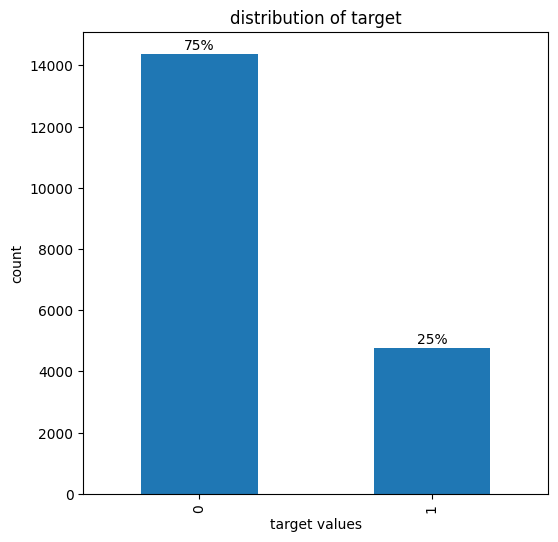

In [111]:
count = df_train.target.value_counts()
print( count )
plt.figure(figsize = (6,6))
ax = count.plot(kind='bar', color=sb.color_palette()[0])
plt.title('distribution of target');
plt.xlabel('target values');
plt.ylabel('count');
ax.set_xlim(-0.5, count.shape[0] - 0.5)

for i in range(count.shape[0]):
    plt.text(
            i,
            count[i] + 500,
            str(round(100*count[i] /df_train.target.count()))+'%',
              ha='center',
              va = 'top')
plt.show()

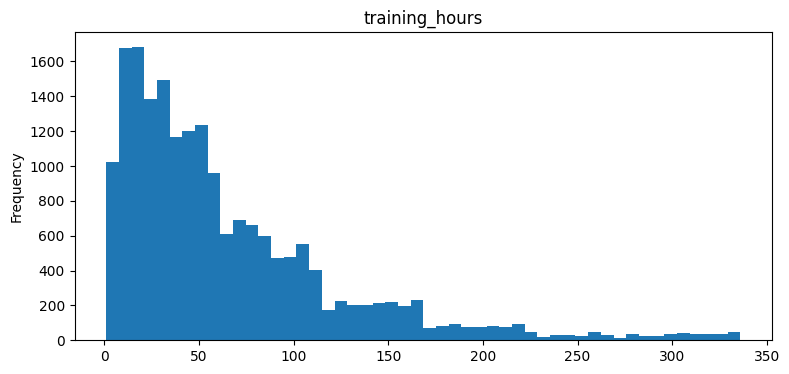

In [112]:
#Training hours
plt.figure(figsize=(9,4))
plt.hist(df_train["training_hours"], color= sb.color_palette()[0] ,bins=50)
plt.ylabel("Frequency")
plt.title('training_hours')
plt.show()

<Axes: >

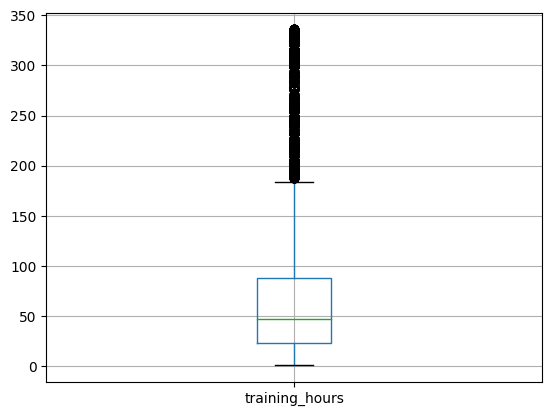

In [113]:
df_train[['training_hours']].boxplot()

In [114]:
IQR = df_train[['training_hours']].quantile(0.75) - df_train[['training_hours']].quantile(0.25)


lower_boundary = df_train[['training_hours']].quantile(0.25) - (IQR * 1.5)
upper_boundary = df_train[['training_hours']].quantile(0.75) + (IQR * 1.5)
print('city_development_index Lower outliers = ',df_train.loc[(df_train['training_hours']<lower_boundary[0])].shape[0])
print('city_development_index Upper outliers = ',df_train.loc[(df_train['training_hours']>upper_boundary[0])].shape[0])

city_development_index Lower outliers =  0
city_development_index Upper outliers =  984


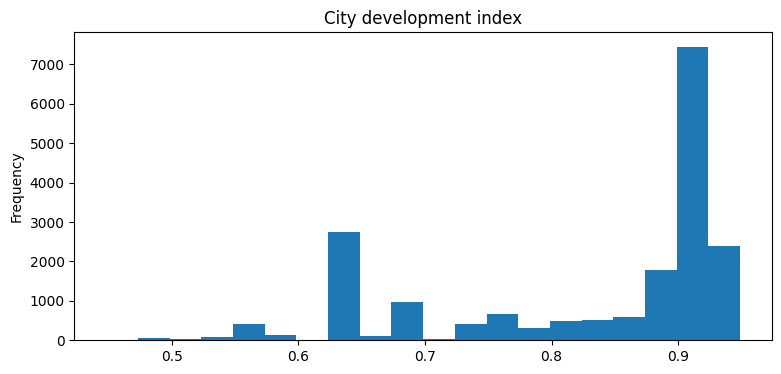

In [115]:
#City development index
plt.figure(figsize=(9,4))
plt.hist(df_train["city_development_index"], color= sb.color_palette()[0] ,bins=20)
plt.ylabel("Frequency")
plt.title('City development index')
plt.show()

<Axes: >

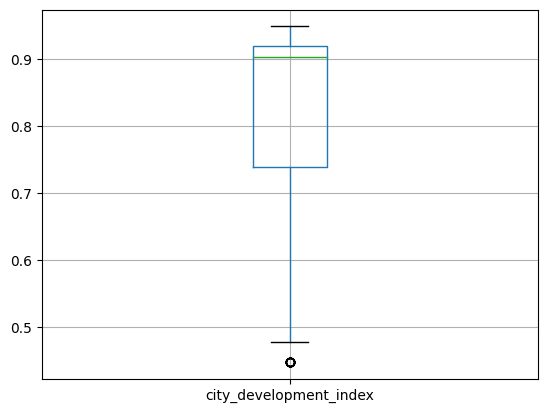

In [116]:
df_train[['city_development_index']].boxplot()

array([[<Axes: title={'center': '0'}>]], dtype=object)

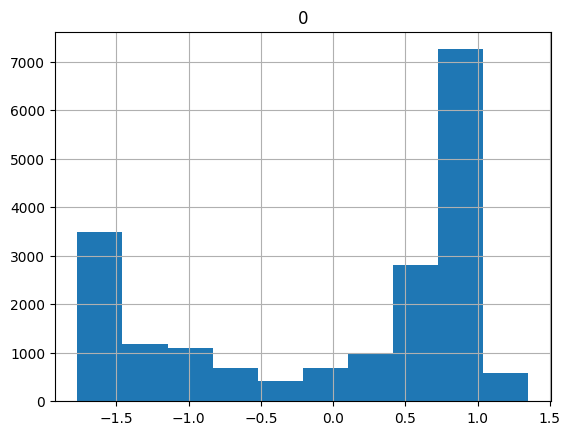

In [117]:
#Transform 'city_development_index'
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
pt.fit(df_train['city_development_index'].values.reshape(-1,1))
tr = pt.transform(df_train['city_development_index'].values.reshape(-1,1))
df_train['city_development_index'] = pd.DataFrame(tr)
pd.DataFrame(tr).hist()

#pt = PowerTransformer(method='box-cox')
#pt.fit(df_train['training_hours'].values.reshape(-1,1))
#tr = pt.transform(df_train['training_hours'].values.reshape(-1,1))
#df_train['training_hours'] = pd.DataFrame(tr)
#pd.DataFrame(tr).hist()

<Axes: >

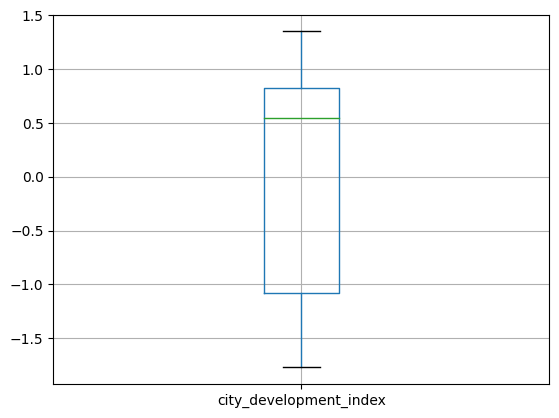

In [118]:
#We tried to use Box-Cox to transform the continues columns which are 'city_development_index' and 'training_hours' but the accuracy decreased.
df_train[['city_development_index']].boxplot()

In [119]:
IQR = df_train[['city_development_index']].quantile(0.75) - df_train[['city_development_index']].quantile(0.25)

lower_boundary_1 = df_train[['city_development_index']].quantile(0.25) - (IQR * 1.5)
upper_boundary_1 = df_train[['city_development_index']].quantile(0.75) + (IQR * 1.5)
#df=np.where(df_train[['city_development_index']] > upper_boundary, upper_boundary,
#np.where(df_train[['city_development_index']] <lower_boundary, lower_boundary,df_train[['city_development_index']]))
print('city_development_index Lower outliers = ',df_train.loc[(df_train['city_development_index']<lower_boundary_1[0])].shape[0])
print('city_development_index Upper outliers = ',df_train.loc[(df_train['city_development_index']>upper_boundary_1[0])].shape[0])

city_development_index Lower outliers =  0
city_development_index Upper outliers =  0


Gender

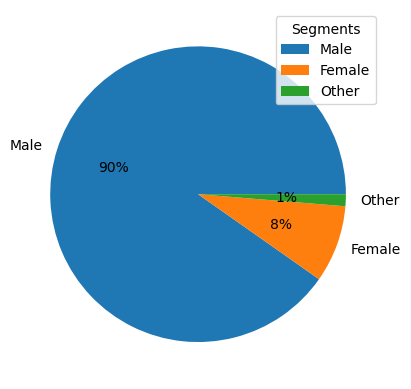

In [120]:
plt.pie(df_train.gender.value_counts(), labels=df_train.gender.value_counts().index,autopct='%.0f%%')
plt.legend(title='Segments')

plt.show()

Relevant Experience

Has relevent experience    13789
No relevent experience      5366
Name: relevent_experience, dtype: int64


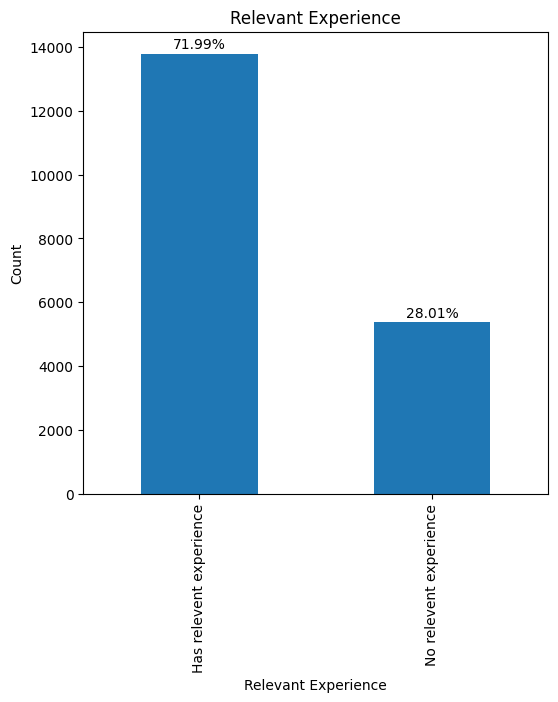

In [121]:
count = df_train['relevent_experience'].value_counts()
print( count )

plt.figure(figsize=(6, 6))
ax = count.plot(kind='bar', color=sb.color_palette()[0])

plt.title('Relevant Experience')
plt.xlabel('Relevant Experience')
plt.ylabel('Count')

for i, v in enumerate(count):
    plt.text(i, v + 500, f'{round(100 * v / len(df_train["relevent_experience"]), 2)}%', ha='center', va='top')

plt.show()

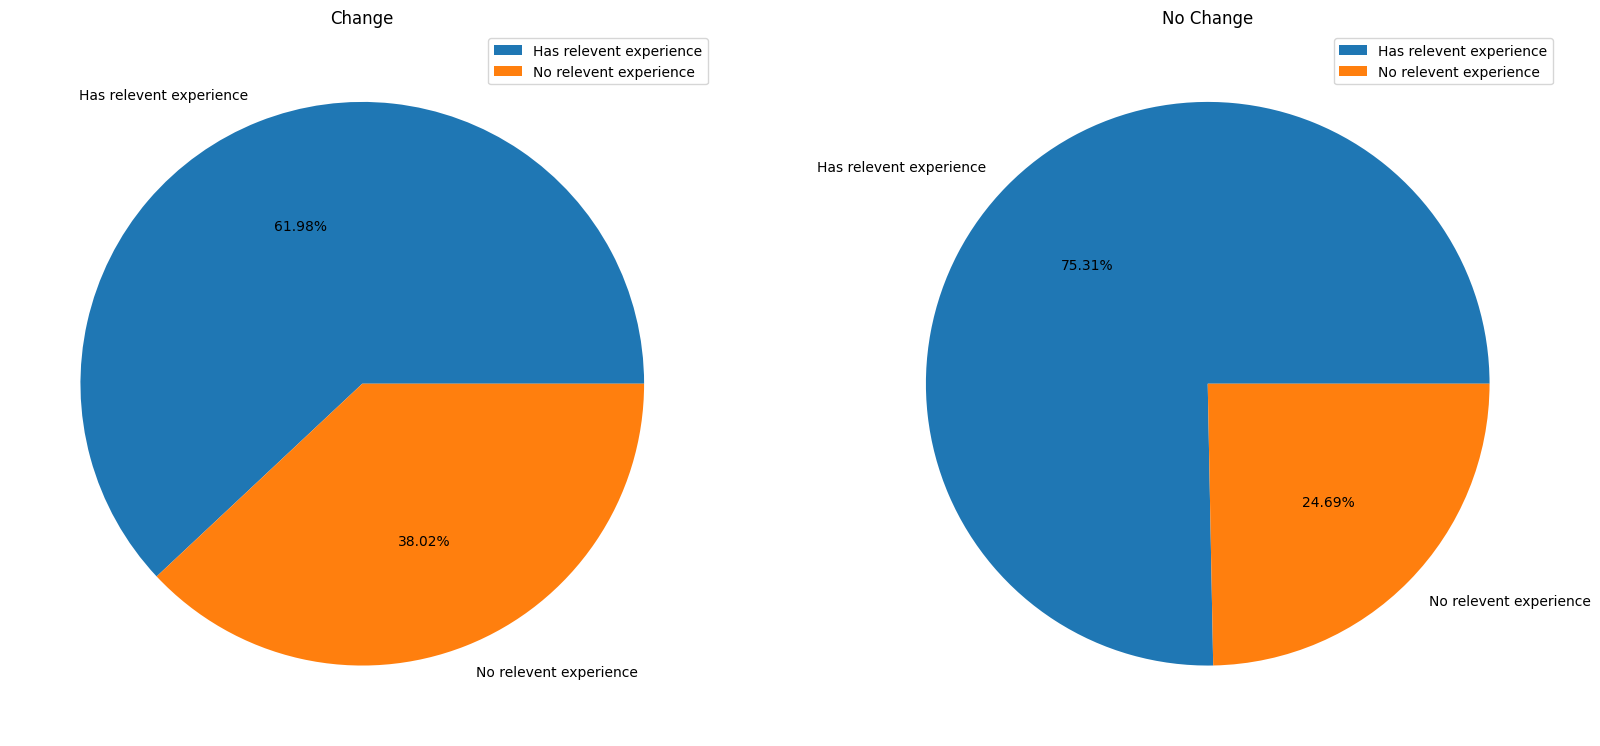

In [122]:
change = df_train[df_train.target == 1].relevent_experience.value_counts()
no_change = df_train[df_train.target == 0].relevent_experience.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

Education Level

Graduate          11596
Masters            4360
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


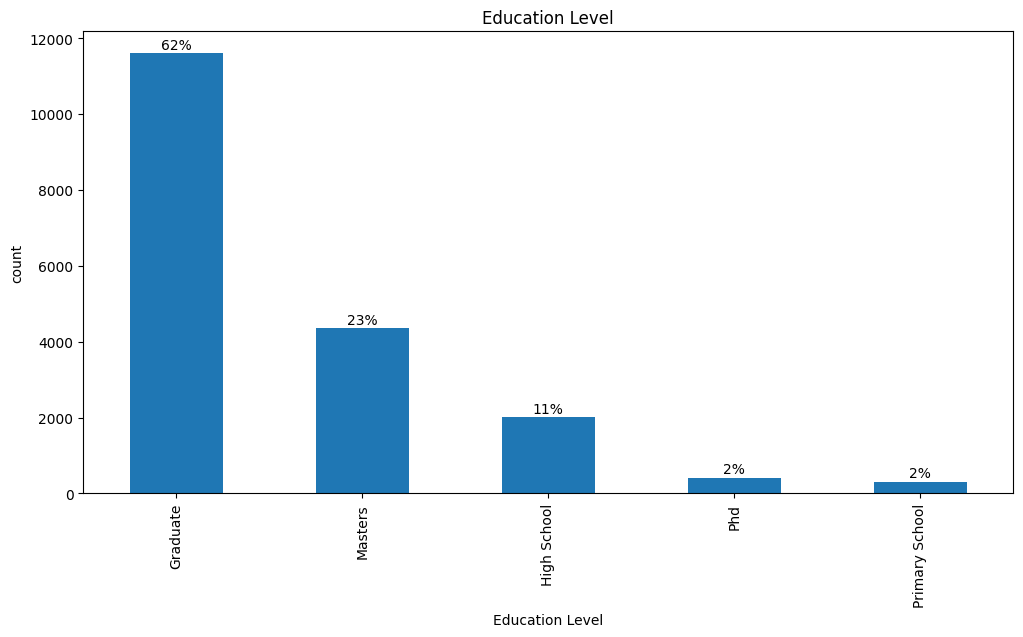

In [123]:
count = df_train.education_level.value_counts()
print( count )
plt.figure(figsize=(12,6))
ax = count.plot(kind='bar', color=sb.color_palette()[0])

plt.title('Education Level');
plt.xlabel('Education Level');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text(
            i,
            count[i] + 400,
            str(round(100*count[i] / df_train.education_level.count()))+'%',
              ha='center',
              va = 'top')

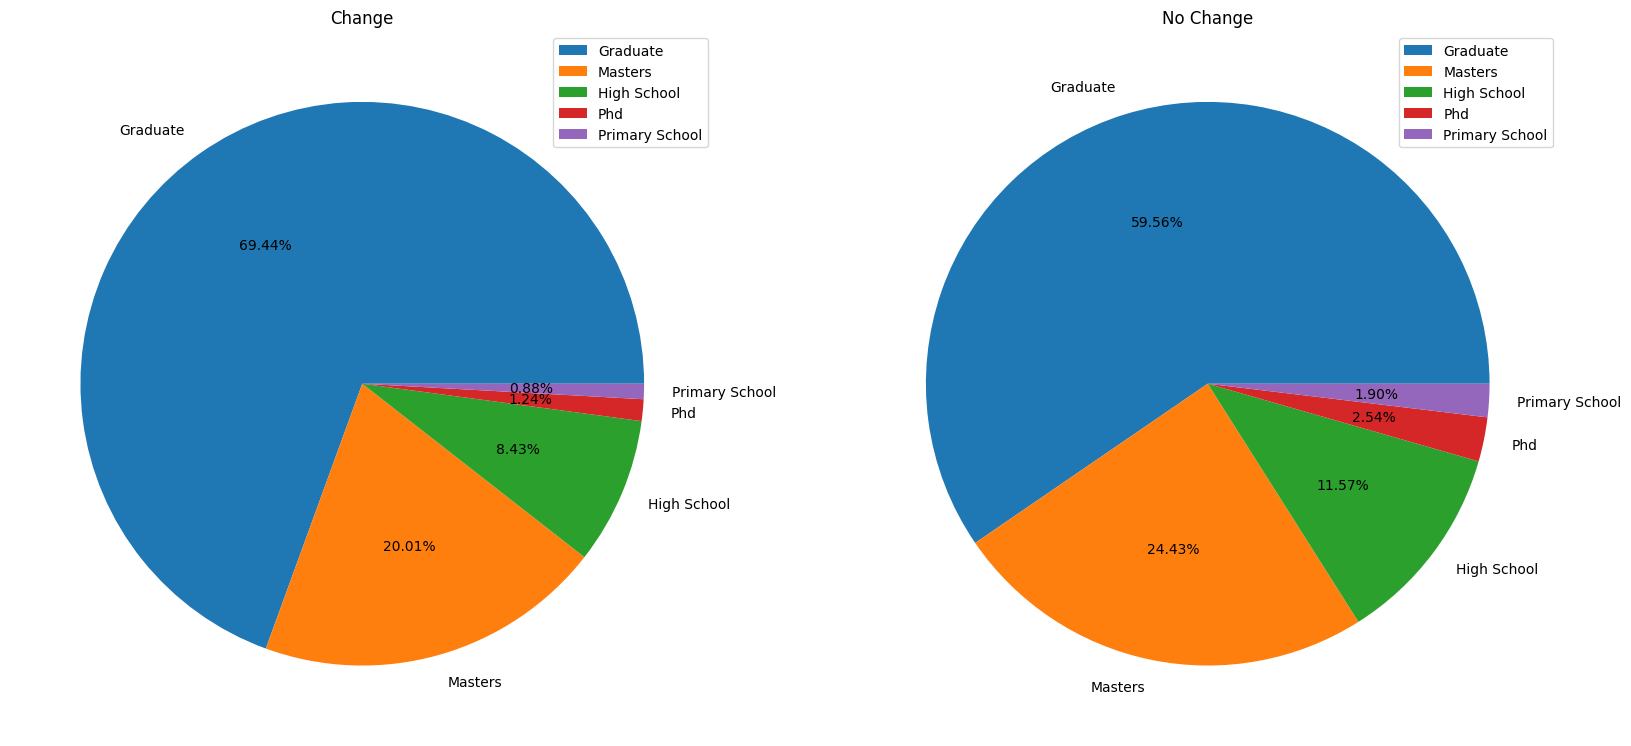

In [124]:
change = df_train[df_train.target == 1].education_level.value_counts()
no_change = df_train[df_train.target == 0].education_level.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

In [125]:
#Major Discipline

STEM               14491
Humanities           668
Other                381
Business Degree      326
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


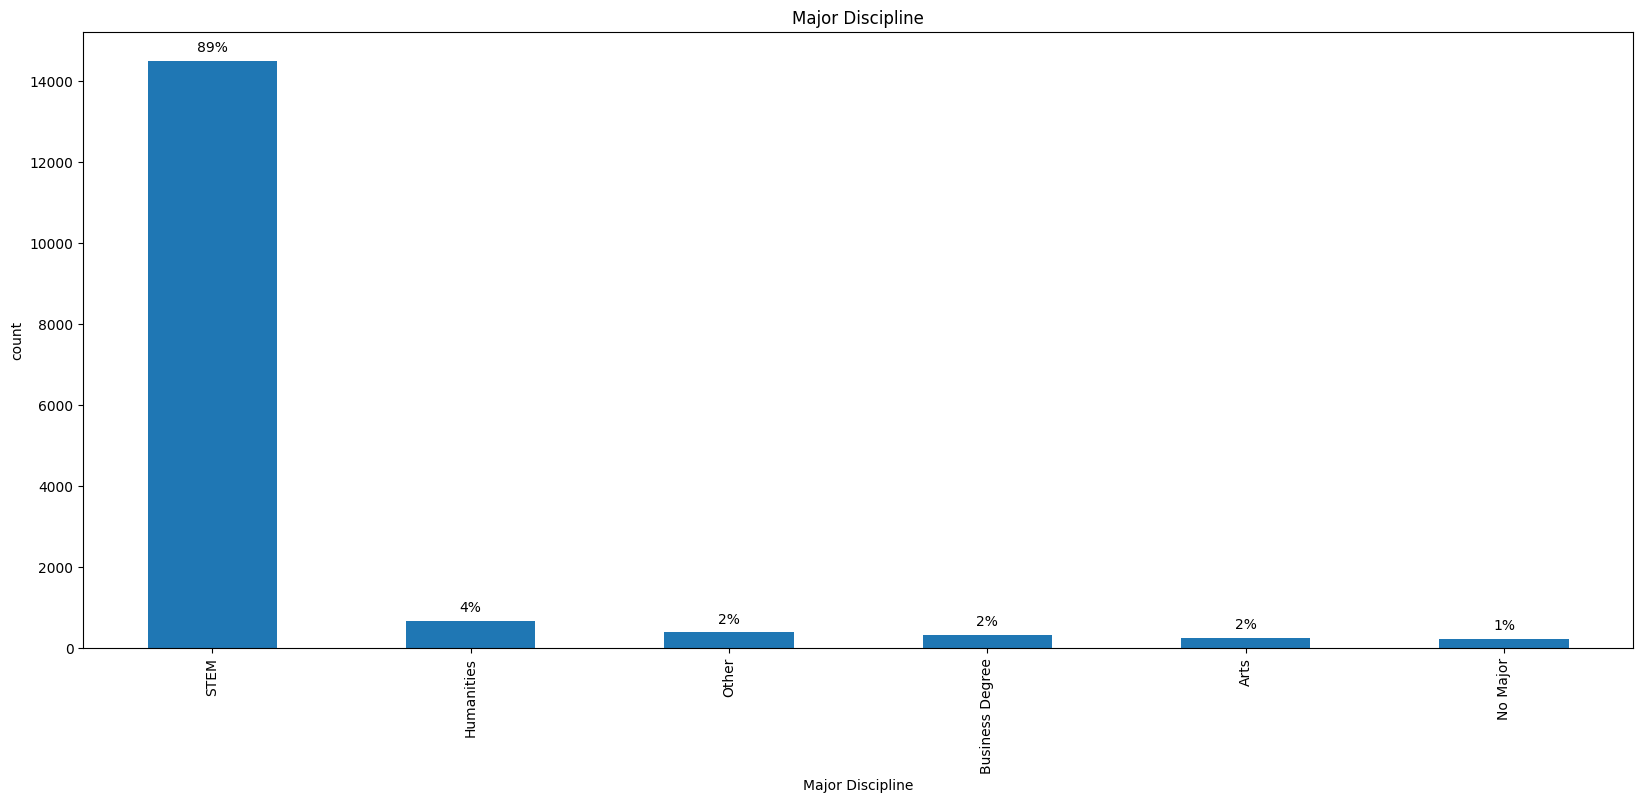

In [126]:
count = df_train.major_discipline.value_counts()
print( count )
order = count.index
plt.figure(figsize=(20,8))
ax = count.plot(kind='bar', color=sb.color_palette()[0])
plt.title('Major Discipline');
plt.xlabel('Major Discipline');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text(
            i,
            count[i] + 500,
            str(round(100*count[i] / df_train.major_discipline.count()))+'%',
              ha='center',
              va = 'top')

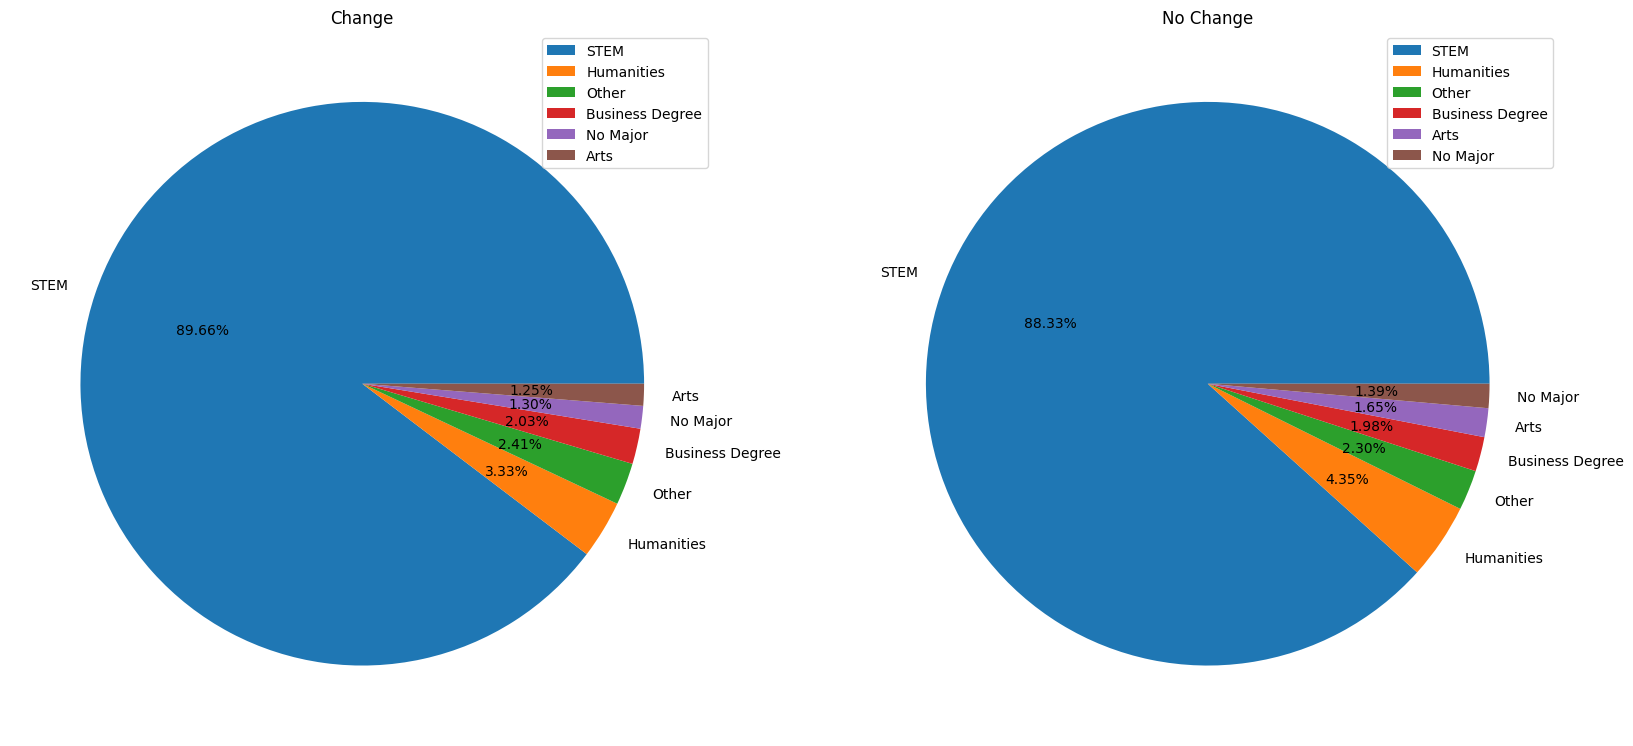

In [127]:
change = df_train[df_train.target == 1].major_discipline.value_counts()
no_change = df_train[df_train.target == 0].major_discipline.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

experience

In [128]:
df_train['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      685
11      664
14      585
1       549
<1      522
16      508
12      493
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [129]:
df_train['experience'].replace({'1':'1-5',
                                '2':'1-5',
                                '3':'1-5',
                                '4':'1-5',
                                '5':'1-5',
                                '6':'6-10',
                                '7':'6-10',
                                '8':'6-10',
                                '9':'6-10',
                                '10':'6-10',
                                '11':'11-15',
                                '12':'11-15',
                                '13':'11-15',
                                '14':'11-15',
                                '15':'11-15',
                                '16':'16-20',
                                '17':'16-20',
                                '18':'16-20',
                                '19':'16-20',
                                '20':'16-20'},inplace=True)

In [130]:
count = df_train.experience.value_counts()
count

1-5      5863
6-10     5011
>20      3286
11-15    2826
16-20    1582
<1        522
Name: experience, dtype: int64

<Figure size 2000x800 with 0 Axes>

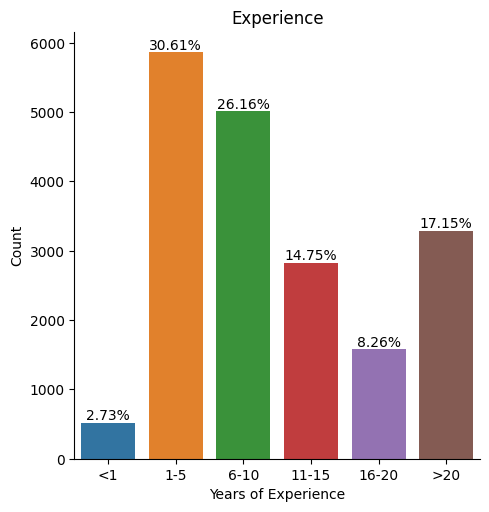

In [131]:
order = ['<1', '1-5', '6-10', '11-15', '16-20', '>20']

# Convert 'experience' to categorical with the specified order
df_train['experience'] = pd.Categorical(df_train['experience'], categories=order, ordered=True)

count = df_train['experience'].value_counts()

plt.figure(figsize=(20, 8))

# Use catplot to create a categorical plot
g = sb.catplot(x='experience', kind='count', data=df_train, order=order, palette=sb.color_palette())

# Use barplot to customize the plot and add percentage text
ax = g.ax
for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(df_train["experience"]) * 100:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height() + 200),
                ha='center', va='top')

plt.title('Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()

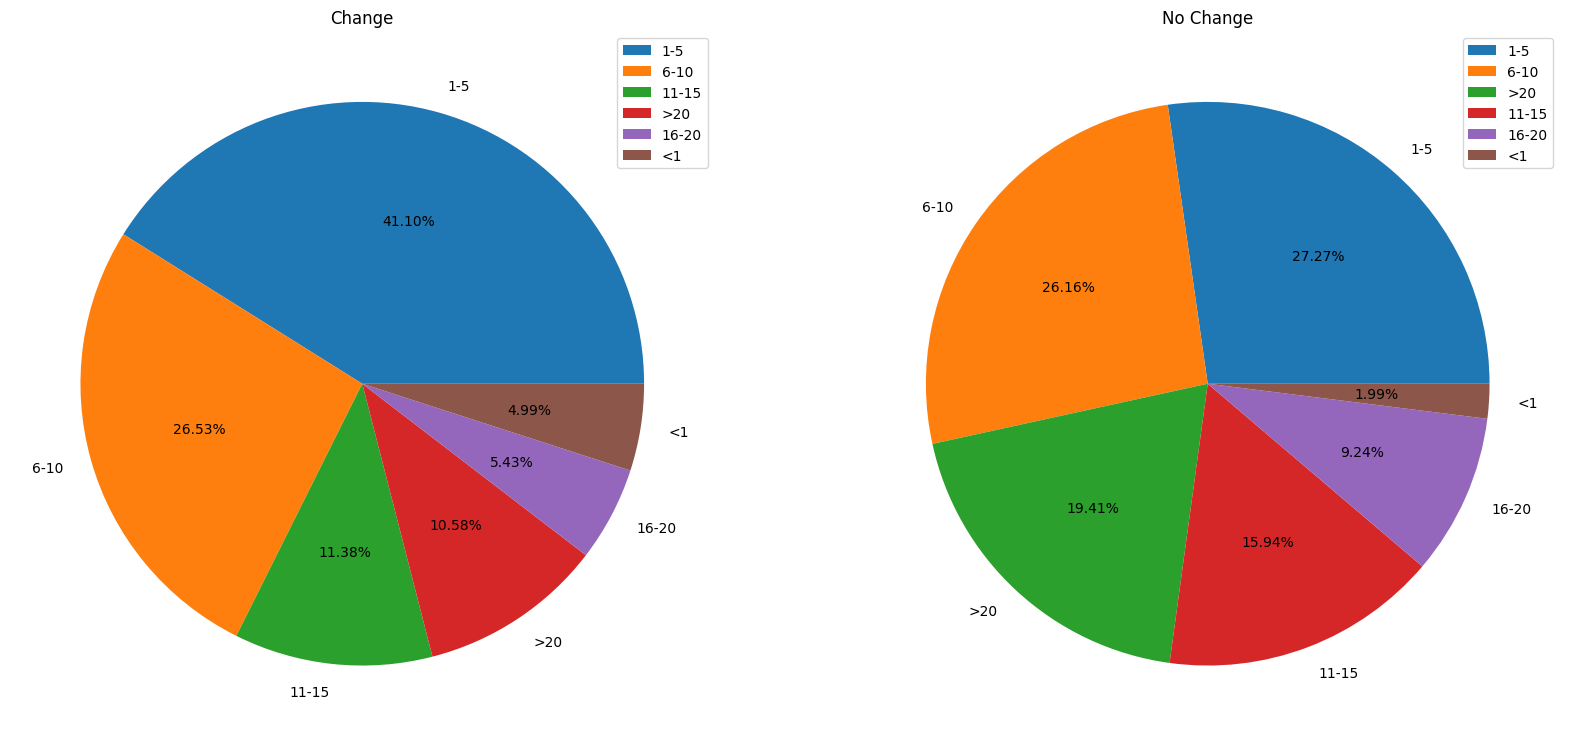

In [132]:
change = df_train[df_train.target == 1].experience.value_counts()
no_change = df_train[df_train.target == 0].experience.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.pie(change,autopct='%1.2f%%',labels=change.index)
plt.legend()
plt.title('Change')
plt.subplot(1,2,2)
plt.pie(no_change,autopct='%1.2f%%',labels=no_change.index)
plt.legend()
plt.title('No Change')
plt.show()

### task 1:  benchmark accuracy without pre‐processing data

In [133]:
#Concatenate the train and test data to preprocessing them
# Make the target of the test data equal -1 so we can separate them after the preprocessing
df_test['target'] = -1

df_concat = pd.concat([df_train, df_test], axis = 0).reset_index(drop = True)
df_concat.target.value_counts()

 0    14378
 1     4777
-1     2129
Name: target, dtype: int64

In [134]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21284 entries, 0 to 21283
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21284 non-null  int64  
 1   city                    21284 non-null  object 
 2   city_development_index  21284 non-null  float64
 3   gender                  16268 non-null  object 
 4   relevent_experience     21284 non-null  object 
 5   enrolled_university     20867 non-null  object 
 6   education_level         20772 non-null  object 
 7   major_discipline        18159 non-null  object 
 8   experience              21214 non-null  object 
 9   company_size            14725 non-null  object 
 10  company_type            14511 non-null  object 
 11  last_new_job            20821 non-null  object 
 12  training_hours          21284 non-null  int64  
 13  target                  21284 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [135]:
#Label Encoding
data =df_concat.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

obj_list = data.select_dtypes(include="object").columns

for obj in obj_list:
    data[obj] = le.fit_transform(data[obj].astype(str))

data.head().T

,0,1,2,3,4
enrollee_id,8949.000000,29725.000000,11561.000000,33241.000000,666.000000
city,5.000000,77.000000,64.000000,14.000000,50.000000
city_development_index,0.821374,-0.847952,-1.543708,-0.748755,-0.911999
gender,1.000000,1.000000,3.000000,3.000000,1.000000
relevent_experience,0.000000,1.000000,1.000000,1.000000,0.000000
enrolled_university,3.000000,3.000000,0.000000,2.000000,3.000000
education_level,0.000000,0.000000,0.000000,0.000000,2.000000
major_discipline,5.000000,5.000000,5.000000,1.000000,5.000000
experience,25.000000,4.000000,1.000000,24.000000,25.000000
company_size,9.000000,4.000000,9.000000,9.000000,4.000000


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21284 entries, 0 to 21283
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21284 non-null  int64  
 1   city                    21284 non-null  int64  
 2   city_development_index  21284 non-null  float64
 3   gender                  21284 non-null  int64  
 4   relevent_experience     21284 non-null  int64  
 5   enrolled_university     21284 non-null  int64  
 6   education_level         21284 non-null  int64  
 7   major_discipline        21284 non-null  int64  
 8   experience              21284 non-null  int64  
 9   company_size            21284 non-null  int64  
 10  company_type            21284 non-null  int64  
 11  last_new_job            21284 non-null  int64  
 12  training_hours          21284 non-null  int64  
 13  target                  21284 non-null  int64  
dtypes: float64(1), int64(13)
memory usage:

In [137]:
data.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.821374,1,0,3,0,5,25,9,6,0,36,1
1,29725,77,-0.847952,1,1,3,0,5,4,4,5,4,47,0
2,11561,64,-1.543708,3,1,0,0,5,1,9,6,6,83,0
3,33241,14,-0.748755,3,1,2,0,1,24,9,5,6,52,1
4,666,50,-0.911999,1,0,3,2,5,25,4,1,3,8,0
5,21651,57,-0.932541,3,0,1,0,5,4,9,6,0,24,1
6,28806,49,0.821374,1,0,3,1,6,1,4,1,0,24,0
7,402,83,-0.946018,1,0,3,0,5,4,7,5,4,18,1
8,27107,5,0.821374,1,0,3,0,5,20,4,5,0,46,1
9,699,5,0.821374,3,0,3,0,5,10,3,5,4,123,0


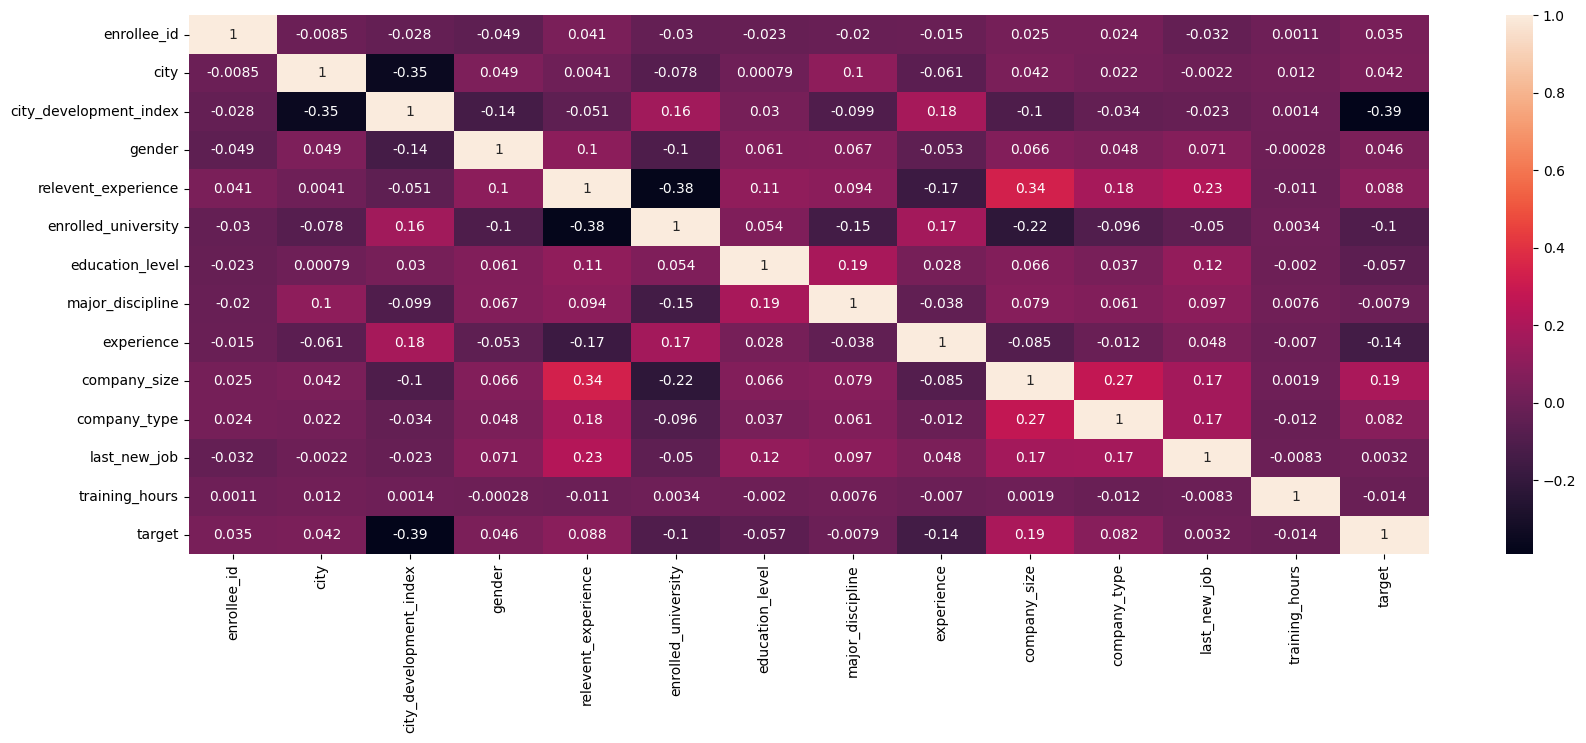

In [138]:
#The Correlation of the data¶
correlation= data.corr()
plt.figure(figsize=(20,7))
sns.heatmap(correlation,annot=True)
plt.savefig('corr.png')

In [139]:
# Separate train and test data
# separate the df_train from df_test

train_data = data[data['target'] != -1].reset_index(drop = True)
test_data= data[data['target'] == -1].reset_index(drop = True)

# then drop target of -1
test_data = test_data.drop(columns=['enrollee_id', 'target','city'], axis=1)
test_data.head(1)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,1,0,0,0,5,23,7,6,0,21


In [140]:
x = train_data.drop(['enrollee_id', 'target','city'], axis = 1)
y = train_data['target']

In [141]:
#Train & Test split
from sklearn.model_selection import train_test_split,cross_val_score

x_train, x_test , y_train, y_test =train_test_split(x, y, test_size=0.25, random_state=42 , stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())

0    10783
1     3583
Name: target, dtype: int64
0    3595
1    1194
Name: target, dtype: int64


In [142]:
!pip install --upgrade scikit-learn

In [143]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### KNN

In [144]:
knnc = KNeighborsClassifier(n_neighbors=4)
knnc.fit(x_train, y_train)
y_pred_knnc = knnc.predict(x_test)
knnc_accuracy = accuracy_score(y_test,knnc.predict(x_test))

print(classification_report(y_test, y_pred_knnc))
print("Accuracy score of KNN : {:.2f}".format(accuracy_score(y_pred_knnc,y_test)))
print("Precision score of KNN: {:.2f}".format(precision_score(y_pred_knnc,y_test,zero_division = True)))
print("F1 score of KNN: {:.2f}".format(f1_score(y_pred_knnc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      3595
           1       0.48      0.16      0.25      1194

    accuracy                           0.75      4789
   macro avg       0.63      0.55      0.55      4789
weighted avg       0.70      0.75      0.70      4789

Accuracy score of KNN : 0.75
Precision score of KNN: 0.16
F1 score of KNN: 0.25


### Logistic Regression model

In [145]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2' , C=0.5)

#Cross Validation
from sklearn.model_selection import KFold , cross_val_score

K_fold = KFold(n_splits=10 , shuffle= True , random_state= 42)

scoring = "accuracy"
score = cross_val_score(lr , x,y, cv= K_fold , scoring=scoring )

print (score)
round(np.mean(score)*100 , 2)

[0.77609603 0.77870564 0.77139875 0.7473904  0.77400835 0.76710183
 0.74882507 0.76501305 0.75874674 0.76396867]


76.51

In [146]:
lr.fit(x_train , y_train )

print ('Train Score =>',lr.score(x_train , y_train ))
print ('Test Score =>',lr.score(x_test , y_test ))
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr.predict(x_test))
print(classification_report(y_test, y_pred_lr))
print("Accuracy score of Logistic Regression : {:.2f}".format(accuracy_score(y_pred_lr,y_test)))
print("Precision score of Logistic Regression : {:.2f}".format(precision_score(y_pred_lr,y_test,zero_division = True)))
print("F1 score of Logistic Regression : {:.2f}".format(f1_score(y_pred_lr,y_test,zero_division=True)))

Train Score => 0.7639565641097035
Test Score => 0.7663395280851952
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      3595
           1       0.57      0.25      0.34      1194

    accuracy                           0.77      4789
   macro avg       0.68      0.59      0.60      4789
weighted avg       0.74      0.77      0.73      4789

Accuracy score of Logistic Regression : 0.77
Precision score of Logistic Regression : 0.25
F1 score of Logistic Regression : 0.34


### Decision tree model

In [147]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)

print (dt.score(x_train,y_train))
print (dt.score(x_test,y_test))

0.8017541417235139
0.8012111087909793


In [148]:
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt.predict(x_test))
print(classification_report(y_test, y_pred_dt))
print("Accuracy score of Decision tree : {:.2f}".format(accuracy_score(y_pred_dt,y_test)))
print("Precision score of Decision tree : {:.2f}".format(precision_score(y_pred_dt,y_test,zero_division = True)))
print("F1 score of Dcision tree : {:.2f}".format(f1_score(y_pred_dt,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3595
           1       0.60      0.59      0.60      1194

    accuracy                           0.80      4789
   macro avg       0.73      0.73      0.73      4789
weighted avg       0.80      0.80      0.80      4789

Accuracy score of Decision tree : 0.80
Precision score of Decision tree : 0.59
F1 score of Dcision tree : 0.60


### Random forest classifier use grid search

In [149]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50, class_weight = {0:1, 1:4})
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc.predict(x_test))

print(classification_report(y_test, y_pred_rfc))
print("Accuracy score of Random forest : {:.2f}".format(accuracy_score(y_pred_rfc,y_test)))
print("Precision score of Random forest : {:.2f}".format(precision_score(y_pred_rfc,y_test,zero_division = True)))
print("F1 score of Random forest : {:.2f}".format(f1_score(y_pred_rfc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3595
           1       0.59      0.43      0.50      1194

    accuracy                           0.78      4789
   macro avg       0.71      0.67      0.68      4789
weighted avg       0.77      0.78      0.77      4789

Accuracy score of Random forest : 0.78
Precision score of Random forest : 0.43
F1 score of Random forest : 0.50


### task 1: END HERE

### 2. Data Preprocessing

Concatenate the train and test data to preprocessing them

In [150]:
# Load data
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ML project/aug1_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ML project/aug_test.csv')

# Make the target of the test data equal -1 so we can separate them after the preprocessing
df_test['target'] = -1

df_concat = pd.concat([df_train, df_test], axis = 0).reset_index(drop = True)
df_concat.target.value_counts()

 0    14378
 1     4777
-1     2129
Name: target, dtype: int64

### 2.1 drop missing valuas

In [151]:
#WITH DROPPING MISSING VARIABLES

# Drop rows with missing values
df_drop = df_concat.copy()
df_drop = df_drop.dropna()

#Label Encoding
data =df_drop.copy()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

obj_list = df_drop.select_dtypes(include="object").columns

for obj in obj_list:
    df_drop[obj] = le.fit_transform(data[obj].astype(str))

df_drop.head().T

# Separate train and test data
# separate the df_train from df_test

train_data = df_drop[df_drop['target'] != -1].reset_index(drop = True)
test_data= df_drop[df_drop['target'] == -1].reset_index(drop = True)

# then drop target of -1
test_data = test_data.drop(columns=['enrollee_id', 'target','city'], axis=1)
test_data.head(1)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,1,0,2,1,5,2,0,5,0,39


In [152]:
# pd.DataFrame(df_concat.isnull().sum())
test_data.dropna(subset=['enrolled_university','education_level','experience','last_new_job'],inplace=True)
pd.DataFrame(test_data.isna().sum()/len(df_train)*100)

,0
city_development_index,0.0
gender,0.0
relevent_experience,0.0
enrolled_university,0.0
education_level,0.0
major_discipline,0.0
experience,0.0
company_size,0.0
company_type,0.0
last_new_job,0.0


In [153]:
x = train_data.drop(['enrollee_id', 'target','city'], axis = 1)
y = train_data['target']

In [154]:
#Train & Test split
from sklearn.model_selection import train_test_split,cross_val_score

x_train, x_test , y_train, y_test =train_test_split(x, y, test_size=0.25, random_state=42 , stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())

0    5602
1    1112
Name: target, dtype: int64
0    1868
1     371
Name: target, dtype: int64


In [155]:
knnc = KNeighborsClassifier(n_neighbors=4)
knnc.fit(x_train, y_train)
y_pred_knnc = knnc.predict(x_test)
knnc_accuracy = accuracy_score(y_test,knnc.predict(x_test))

print(classification_report(y_test, y_pred_knnc))
print("Accuracy score of KNN : {:.2f}".format(accuracy_score(y_pred_knnc,y_test)))
print("Precision score of KNN: {:.2f}".format(precision_score(y_pred_knnc,y_test,zero_division = True)))
print("F1 score of KNN: {:.2f}".format(f1_score(y_pred_knnc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1868
           1       0.31      0.03      0.06       371

    accuracy                           0.83      2239
   macro avg       0.57      0.51      0.48      2239
weighted avg       0.75      0.83      0.76      2239

Accuracy score of KNN : 0.83
Precision score of KNN: 0.03
F1 score of KNN: 0.06


In [156]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2' , C=0.5)

#Cross Validation
from sklearn.model_selection import KFold , cross_val_score

K_fold = KFold(n_splits=10 , shuffle= True , random_state= 42)

scoring = "accuracy"
score = cross_val_score(lr , x,y, cv= K_fold , scoring=scoring )


lr.fit(x_train , y_train )

print ('Train Score =>',lr.score(x_train , y_train ))
print ('Test Score =>',lr.score(x_test , y_test ))
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr.predict(x_test))
print(classification_report(y_test, y_pred_lr))
print("Accuracy score of Logistic Regression : {:.2f}".format(accuracy_score(y_pred_lr,y_test)))
print("Precision score of Logistic Regression : {:.2f}".format(precision_score(y_pred_lr,y_test,zero_division = True)))
print("F1 score of Logistic Regression : {:.2f}".format(f1_score(y_pred_lr,y_test,zero_division=True)))

Train Score => 0.8358653559725946
Test Score => 0.8383206788744976
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1868
           1       0.64      0.06      0.10       371

    accuracy                           0.84      2239
   macro avg       0.74      0.53      0.51      2239
weighted avg       0.81      0.84      0.78      2239

Accuracy score of Logistic Regression : 0.84
Precision score of Logistic Regression : 0.06
F1 score of Logistic Regression : 0.10


In [157]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)

print (dt.score(x_train,y_train))
print (dt.score(x_test,y_test))

y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt.predict(x_test))
print(classification_report(y_test, y_pred_dt))
print("Accuracy score of Decision Tree : {:.2f}".format(accuracy_score(y_pred_dt,y_test)))
print("Precision score of Decision Tree : {:.2f}".format(precision_score(y_pred_dt,y_test,zero_division = True)))
print("F1 score of Decision Tree : {:.2f}".format(f1_score(y_pred_dt,y_test,zero_division=True)))

0.8711647304140602
0.8570790531487271
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1868
           1       0.59      0.47      0.52       371

    accuracy                           0.86      2239
   macro avg       0.74      0.70      0.72      2239
weighted avg       0.85      0.86      0.85      2239

Accuracy score of Decision Tree : 0.86
Precision score of Decision Tree : 0.47
F1 score of Decision Tree : 0.52


In [158]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50, class_weight = {0:1, 1:4})
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc.predict(x_test))

print(classification_report(y_test, y_pred_rfc))
print("Accuracy score of Random forest : {:.2f}".format(accuracy_score(y_pred_rfc,y_test)))
print("Precision score of Random forest : {:.2f}".format(precision_score(y_pred_rfc,y_test,zero_division = True)))
print("F1 score of Random forest : {:.2f}".format(f1_score(y_pred_rfc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1868
           1       0.58      0.33      0.42       371

    accuracy                           0.85      2239
   macro avg       0.73      0.64      0.67      2239
weighted avg       0.83      0.85      0.83      2239

Accuracy score of Random forest : 0.85
Precision score of Random forest : 0.33
F1 score of Random forest : 0.42


### 2.2 FILLING MEAN VALUES

In [159]:
#WITH FILLING MEAN VALUES
# Step 3: Data Preprocessing with Filling Missing Values

# Fill missing values with mean for numerical columns
#train_data_filled = train_data.fillna(train_data.mean())

# Separate features and target variable for training data
#X = train_data_filled.drop(['enrollee_id', 'target'], axis=1)
#y = train_data_filled['target']

# Convert categorical variables to numerical using

# Load data
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ML project/aug1_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ML project/aug_test.csv')

# Make the target of the test data equal -1 so we can separate them after the preprocessing
df_test['target'] = -1

df_concat = pd.concat([df_train, df_test], axis = 0).reset_index(drop = True)
df_concat.target.value_counts()
# Drop rows with missing values
df_mean = df_concat.copy()
df_mean = df_mean.fillna(train_data.mean())

#Label Encoding
data =df_mean.copy()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

obj_list = df_mean.select_dtypes(include="object").columns

for obj in obj_list:
    df_mean[obj] = le.fit_transform(data[obj].astype(str))

df_mean.head().T

# Separate train and test data
# separate the df_train from df_test

train_data_mean = df_mean[df_mean['target'] != -1].reset_index(drop = True)
test_data_mean= df_mean[df_mean['target'] == -1].reset_index(drop = True)

# then drop target of -1
test_data_mean = test_data_mean.drop(columns=['enrollee_id', 'target','city'], axis=1)
test_data_mean.head(1)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,2,0,1,1,6,20,8,0,0,21


In [160]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ML project/aug1_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/ML project/aug_test.csv')

# Make the target of the test data equal -1 so we can separate them after the preprocessing
df_test['target'] = -1

# Fill missing values with mean for training data
df_train_mean = df_train.fillna(df_train.mean())

# Fill missing values with mean for test data
df_test_mean = df_test.fillna(df_test.mean())

# Label Encoding for both datasets
le = LabelEncoder()

obj_list_train = df_train_mean.select_dtypes(include="object").columns
obj_list_test = df_test_mean.select_dtypes(include="object").columns

for obj in obj_list_train:
    df_train_mean[obj] = le.fit_transform(df_train_mean[obj].astype(str))

for obj in obj_list_test:
    df_test_mean[obj] = le.fit_transform(df_test_mean[obj].astype(str))

# Separate train and test data
train_data_mean = df_train_mean.copy()
test_data_mean = df_test_mean.copy()


# Display the first row of test_data_mean
test_data_mean.head(1)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,69,0.827,1,0,0,0,5,19,7,6,0,21,-1


In [161]:
# pd.DataFrame(df_concat.isnull().sum())
test_data_mean.dropna(subset=['enrolled_university','education_level','experience','last_new_job'],inplace=True)
pd.DataFrame(test_data_mean.isna().sum()/len(df_train)*100)

,0
enrollee_id,0.0
city,0.0
city_development_index,0.0
gender,0.0
relevent_experience,0.0
enrolled_university,0.0
education_level,0.0
major_discipline,0.0
experience,0.0
company_size,0.0


In [162]:
x = train_data_mean.drop(['enrollee_id', 'target','city'], axis = 1)
y = train_data_mean['target']

In [163]:
#Train & Test split
from sklearn.model_selection import train_test_split,cross_val_score

x_train, x_test , y_train, y_test =train_test_split(x, y, test_size=0.25, random_state=42 , stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())

0    10783
1     3583
Name: target, dtype: int64
0    3595
1    1194
Name: target, dtype: int64


In [164]:
knnc = KNeighborsClassifier(n_neighbors=4)
knnc.fit(x_train, y_train)
y_pred_knnc = knnc.predict(x_test)
knnc_accuracy = accuracy_score(y_test,knnc.predict(x_test))

print(classification_report(y_test, y_pred_knnc))
print("Accuracy score of KNN : {:.2f}".format(accuracy_score(y_pred_knnc,y_test)))
print("Precision score of KNN: {:.2f}".format(precision_score(y_pred_knnc,y_test,zero_division = True)))
print("F1 score of KNN: {:.2f}".format(f1_score(y_pred_knnc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84      3595
           1       0.42      0.14      0.21      1194

    accuracy                           0.74      4789
   macro avg       0.59      0.54      0.53      4789
weighted avg       0.68      0.74      0.69      4789

Accuracy score of KNN : 0.74
Precision score of KNN: 0.14
F1 score of KNN: 0.21


In [165]:
# Calculate accuracy, precision, and F1 score for each class
accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred_knnc[y_test == 0])
accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred_knnc[y_test == 1])

# Display results
print("Accuracy for Class 0: {:.2f}".format(accuracy_class_0))
print("Accuracy for Class 1: {:.2f}".format(accuracy_class_1))

Accuracy for Class 0: 0.94
Accuracy for Class 1: 0.14


In [166]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2' , C=0.5)

#Cross Validation
from sklearn.model_selection import KFold , cross_val_score

K_fold = KFold(n_splits=10 , shuffle= True , random_state= 42)

scoring = "accuracy"
score = cross_val_score(lr , x,y, cv= K_fold , scoring=scoring )

lr.fit(x_train , y_train )

print ('Train Score =>',lr.score(x_train , y_train ))
print ('Test Score =>',lr.score(x_test , y_test ))
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr.predict(x_test))
print(classification_report(y_test, y_pred_lr))
print("Accuracy score of Logistic Regression : {:.2f}".format(accuracy_score(y_pred_lr,y_test)))
print("Precision score of Logistic Regression : {:.2f}".format(precision_score(y_pred_lr,y_test,zero_division = True)))
print("F1 score of Logistic Regression : {:.2f}".format(f1_score(y_pred_lr,y_test,zero_division=True)))

Train Score => 0.7619379089516914
Test Score => 0.7615368552933807
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      3595
           1       0.57      0.17      0.26      1194

    accuracy                           0.76      4789
   macro avg       0.68      0.56      0.56      4789
weighted avg       0.73      0.76      0.71      4789

Accuracy score of Logistic Regression : 0.76
Precision score of Logistic Regression : 0.17
F1 score of Logistic Regression : 0.26


In [167]:
# Calculate accuracy, precision, and F1 score for each class
accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred_lr[y_test == 0])
accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred_lr[y_test == 1])

# Display results
print("Accuracy for Class 0: {:.2f}".format(accuracy_class_0))
print("Accuracy for Class 1: {:.2f}".format(accuracy_class_1))

Accuracy for Class 0: 0.96
Accuracy for Class 1: 0.17


In [168]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)

print (dt.score(x_train,y_train))
print (dt.score(x_test,y_test))

y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt.predict(x_test))
print(classification_report(y_test, y_pred_dt))
print("Accuracy score of Decision Tree : {:.2f}".format(accuracy_score(y_pred_dt,y_test)))
print("Precision score of Decision Tree : {:.2f}".format(precision_score(y_pred_dt,y_test,zero_division = True)))
print("F1 score of Decision Tree : {:.2f}".format(f1_score(y_pred_dt,y_test,zero_division=True)))

0.801823750522066
0.7920233869283775
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3595
           1       0.59      0.54      0.56      1194

    accuracy                           0.79      4789
   macro avg       0.72      0.71      0.71      4789
weighted avg       0.79      0.79      0.79      4789

Accuracy score of Decision Tree : 0.79
Precision score of Decision Tree : 0.54
F1 score of Decision Tree : 0.56


In [169]:
# Calculate accuracy, precision, and F1 score for each class
accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred_dt[y_test == 0])
accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred_dt[y_test == 1])

# Display results
print("Accuracy for Class 0: {:.2f}".format(accuracy_class_0))
print("Accuracy for Class 1: {:.2f}".format(accuracy_class_1))

Accuracy for Class 0: 0.88
Accuracy for Class 1: 0.54


In [170]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50, class_weight = {0:1, 1:4})
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc.predict(x_test))

print(classification_report(y_test, y_pred_rfc))
print("Accuracy score of Random forest : {:.2f}".format(accuracy_score(y_pred_rfc,y_test)))
print("Precision score of Random forest : {:.2f}".format(precision_score(y_pred_rfc,y_test,zero_division = True)))
print("F1 score of Random forest : {:.2f}".format(f1_score(y_pred_rfc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3595
           1       0.60      0.45      0.51      1194

    accuracy                           0.79      4789
   macro avg       0.72      0.67      0.69      4789
weighted avg       0.77      0.79      0.78      4789

Accuracy score of Random forest : 0.79
Precision score of Random forest : 0.45
F1 score of Random forest : 0.51


In [171]:
# Calculate accuracy, precision, and F1 score for each class
accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred_rfc[y_test == 0])
accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred_rfc[y_test == 1])

# Display results
print("Accuracy for Class 0: {:.2f}".format(accuracy_class_0))
print("Accuracy for Class 1: {:.2f}".format(accuracy_class_1))

Accuracy for Class 0: 0.90
Accuracy for Class 1: 0.45


density

In [172]:
# Make the target of the test data equal -1 so we can separate them after the preprocessing
df_test['target'] = -1

df_concat = pd.concat([df_train, df_test], axis = 0).reset_index(drop = True)
df_concat.target.value_counts()

 0    14378
 1     4777
-1     2129
Name: target, dtype: int64

In [173]:
#Handing the missing values
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21284 entries, 0 to 21283
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21284 non-null  int64  
 1   city                    21284 non-null  object 
 2   city_development_index  21284 non-null  float64
 3   gender                  16268 non-null  object 
 4   relevent_experience     21284 non-null  object 
 5   enrolled_university     20867 non-null  object 
 6   education_level         20772 non-null  object 
 7   major_discipline        18159 non-null  object 
 8   experience              21214 non-null  object 
 9   company_size            14725 non-null  object 
 10  company_type            14511 non-null  object 
 11  last_new_job            20821 non-null  object 
 12  training_hours          21284 non-null  int64  
 13  target                  21284 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [174]:
pd.DataFrame(df_concat.isna().sum()/len(df_train))

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,0.261864
relevent_experience,0.000000
enrolled_university,0.021770
education_level,0.026729
major_discipline,0.163143
experience,0.003654
company_size,0.342417


In [175]:
# cat_columns=[column for column in df_concat.columns if df_concat[column].dtype=="object"]

# for column in cat_columns:
#     if df_concat[column].isnull().sum()>0:
#         df_concat[column].replace(np.nan,df_concat[column].mode()[0],inplace=True)

# pd.DataFrame(df_concat.isnull().sum())
df_concat.dropna(subset=['enrolled_university','education_level','experience','last_new_job'],inplace=True)
pd.DataFrame(df_concat.isna().sum()/len(df_train)*100)

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,22.479770
relevent_experience,0.000000
enrolled_university,0.000000
education_level,0.000000
major_discipline,12.900026
experience,0.000000
company_size,30.728269


In [176]:
df_before =df_concat.copy()

filling missing values in the 'major_discipline' column with random choices from the existing non-null values

<Axes: xlabel='major_discipline', ylabel='Density'>

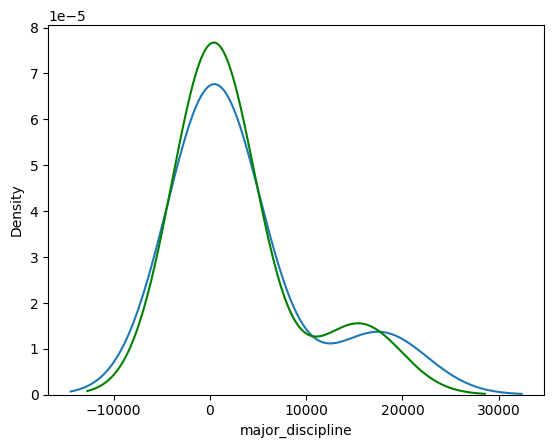

In [177]:
fill_list= df_concat['major_discipline'].dropna()
df_concat['major_discipline'] = df_concat['major_discipline'].fillna(pd.Series(np.random.choice(fill_list, size= len(df_concat.index))))
sns.kdeplot(x=df_concat['major_discipline'].value_counts())
sns.kdeplot(x=df_before['major_discipline'].value_counts(),color='g')

<Axes: xlabel='gender', ylabel='Density'>

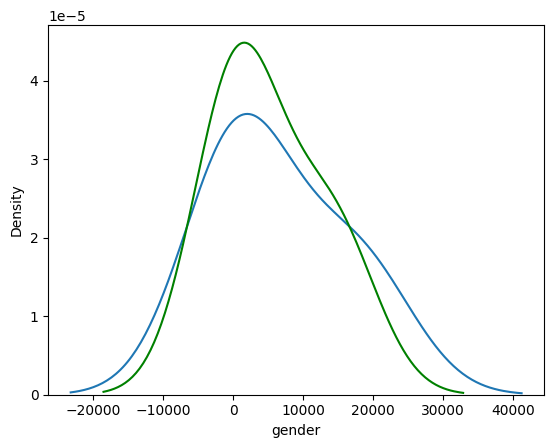

In [178]:
fill_list= df_concat['gender'].dropna()
df_concat['gender'] = df_concat['gender'].fillna(pd.Series(np.random.choice(fill_list, size= len(df_concat.index))))
sns.kdeplot(x=df_concat['gender'].value_counts())
sns.kdeplot(x=df_before['gender'].value_counts(),color='g')

# df_before['gender'].value_counts().plot(kind = 'kde')

In [179]:
df_before.company_size.value_counts()

50-99        3277
100-500      2790
10000+       2178
1000-4999    1419
Oct-49       1394
<10          1390
500-999       928
5000-9999     608
10/49         159
Name: company_size, dtype: int64

<Axes: xlabel='company_size', ylabel='Density'>

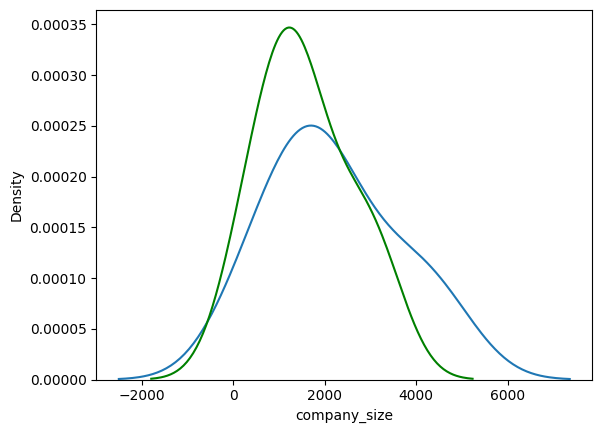

In [180]:
fill_list= df_concat['company_size'].dropna()
df_concat['company_size'] = df_concat['company_size'].fillna(pd.Series(np.random.choice(fill_list, size= len(df_concat.index))))
sns.kdeplot(x=df_concat['company_size'].value_counts())
sns.kdeplot(x=df_before['company_size'].value_counts(),color='g')

In [181]:
df_concat.company_type.value_counts()

Pvt Ltd                10569
Funded Startup          1069
Public Sector           1035
Early Stage Startup      624
NGO                      553
Other                    125
Name: company_type, dtype: int64

<Axes: xlabel='company_type', ylabel='Density'>

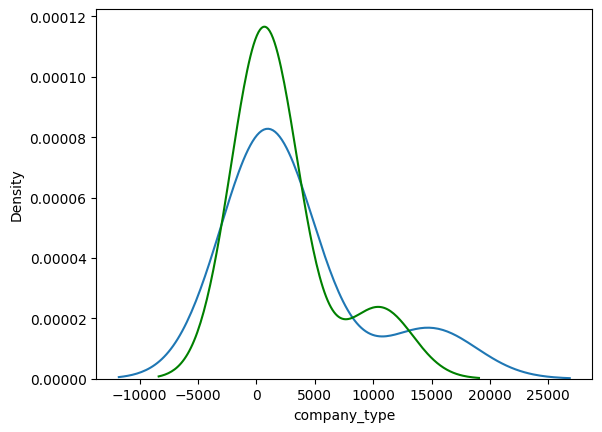

In [182]:
fill_list= df_concat['company_type'].dropna()
df_concat['company_type'] = df_concat['company_type'].fillna(pd.Series(np.random.choice(fill_list, size= len(df_concat.index))))
sns.kdeplot(x=df_concat['company_type'].value_counts())
sns.kdeplot(x=df_before['company_type'].value_counts(),color='g')

In [183]:
df_concat.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    270
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline          148
experience                  0
company_size              335
company_type              337
last_new_job                0
training_hours              0
target                      0
dtype: int64

In [184]:
#Label Encoding
data =df_concat.copy()

In [185]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

obj_list = data.select_dtypes(include="object").columns

for obj in obj_list:
    data[obj] = le.fit_transform(data[obj].astype(str))

data.head().T

,0,1,2,4,5
enrollee_id,8949.00,29725.000,11561.000,666.000,21651.000
city,5.00,77.000,64.000,50.000,57.000
city_development_index,0.92,0.776,0.624,0.767,0.764
gender,1.00,1.000,1.000,1.000,1.000
relevent_experience,0.00,1.000,1.000,0.000,0.000
enrolled_university,2.00,2.000,0.000,2.000,1.000
education_level,0.00,0.000,0.000,2.000,0.000
major_discipline,5.00,5.000,5.000,5.000,5.000
experience,21.00,6.000,15.000,21.000,2.000
company_size,1.00,4.000,1.000,4.000,7.000


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20029 entries, 0 to 21283
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             20029 non-null  int64  
 1   city                    20029 non-null  int64  
 2   city_development_index  20029 non-null  float64
 3   gender                  20029 non-null  int64  
 4   relevent_experience     20029 non-null  int64  
 5   enrolled_university     20029 non-null  int64  
 6   education_level         20029 non-null  int64  
 7   major_discipline        20029 non-null  int64  
 8   experience              20029 non-null  int64  
 9   company_size            20029 non-null  int64  
 10  company_type            20029 non-null  int64  
 11  last_new_job            20029 non-null  int64  
 12  training_hours          20029 non-null  int64  
 13  target                  20029 non-null  int64  
dtypes: float64(1), int64(13)
memory usage:

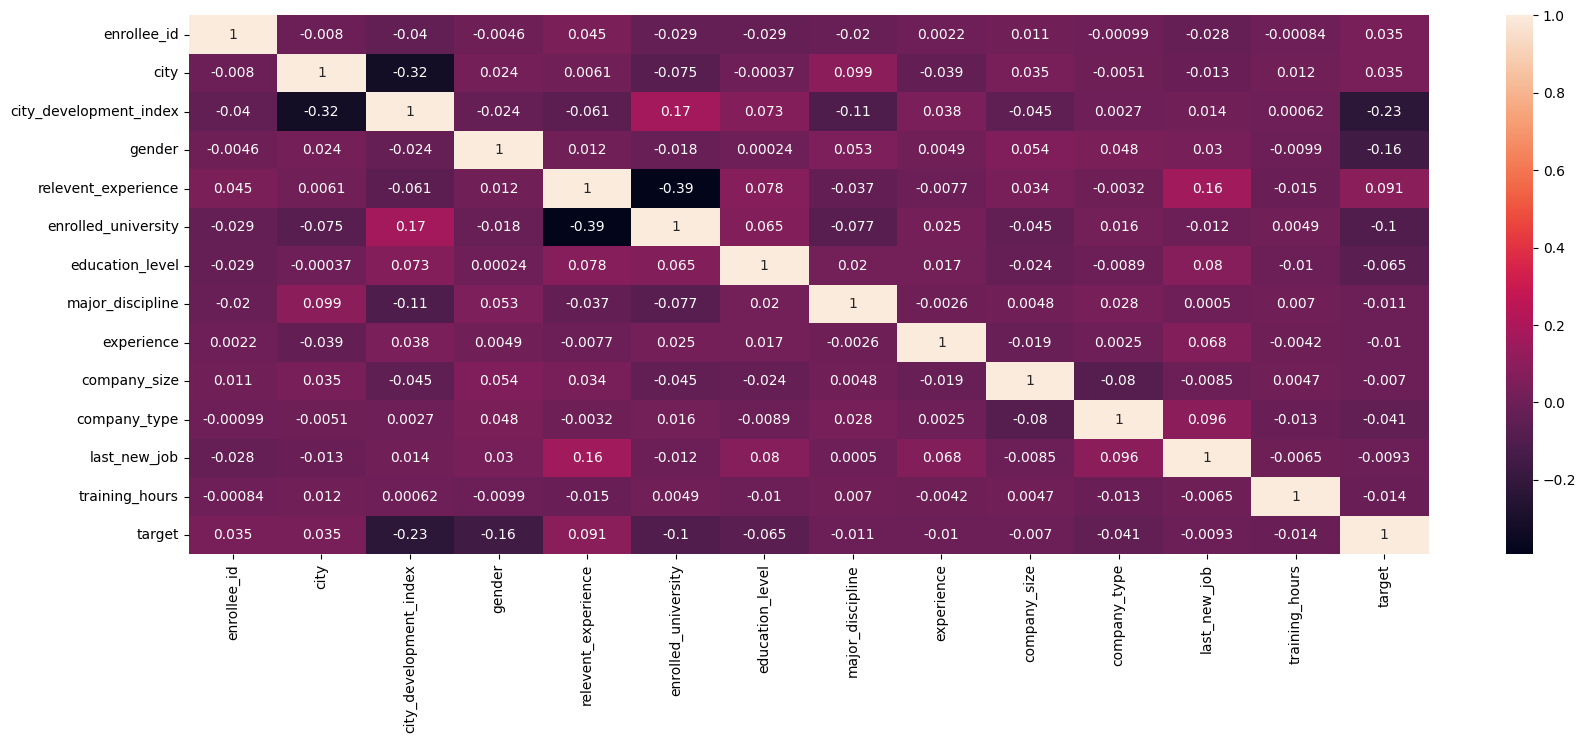

In [187]:
#The Correlation of the data¶
correlation= data.corr()
plt.figure(figsize=(20,7))
sns.heatmap(correlation,annot=True)
plt.savefig('corr.png')

In [188]:
# Separate train and test data
# separate the df_train from df_test

train_data = data[data['target'] != -1].reset_index(drop = True)
test_data= data[data['target'] == -1].reset_index(drop = True)

# then drop target of -1
test_data = test_data.drop(columns=['enrollee_id', 'target','city'], axis=1)
test_data.head(1)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,1,0,0,0,5,19,7,5,0,21


In [189]:
x = train_data.drop(['enrollee_id', 'target','city'], axis = 1)
y = train_data['target']

#Train & Test split
from sklearn.model_selection import train_test_split,cross_val_score

x_train, x_test , y_train, y_test =train_test_split(x, y, test_size=0.25, random_state=42 , stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())

0    10192
1     3316
Name: target, dtype: int64
0    3398
1    1105
Name: target, dtype: int64


In [190]:
knnc = KNeighborsClassifier(n_neighbors=4)
knnc.fit(x_train, y_train)
y_pred_knnc = knnc.predict(x_test)
knnc_accuracy = accuracy_score(y_test,knnc.predict(x_test))

print(classification_report(y_test, y_pred_knnc))
print("Accuracy score of KNN : {:.2f}".format(accuracy_score(y_pred_knnc,y_test)))
print("Precision score of KNN: {:.2f}".format(precision_score(y_pred_knnc,y_test,zero_division = True)))
print("F1 score of KNN: {:.2f}".format(f1_score(y_pred_knnc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85      3398
           1       0.33      0.07      0.12      1105

    accuracy                           0.74      4503
   macro avg       0.55      0.51      0.48      4503
weighted avg       0.65      0.74      0.67      4503

Accuracy score of KNN : 0.74
Precision score of KNN: 0.07
F1 score of KNN: 0.12


In [191]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2' , C=0.5)

#Cross Validation
from sklearn.model_selection import KFold , cross_val_score

K_fold = KFold(n_splits=10 , shuffle= True , random_state= 42)

scoring = "accuracy"
score = cross_val_score(lr , x,y, cv= K_fold , scoring=scoring )


lr.fit(x_train , y_train )

print ('Train Score =>',lr.score(x_train , y_train ))
print ('Test Score =>',lr.score(x_test , y_test ))
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr.predict(x_test))
print(classification_report(y_test, y_pred_lr))
print("Accuracy score of Logistic Regression : {:.2f}".format(accuracy_score(y_pred_lr,y_test)))
print("Precision score of Logistic Regression : {:.2f}".format(precision_score(y_pred_lr,y_test,zero_division = True)))
print("F1 score of Logistic Regression : {:.2f}".format(f1_score(y_pred_lr,y_test,zero_division=True)))

Train Score => 0.7631773763695587
Test Score => 0.759493670886076
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      3398
           1       0.55      0.11      0.18      1105

    accuracy                           0.76      4503
   macro avg       0.66      0.54      0.52      4503
weighted avg       0.72      0.76      0.69      4503

Accuracy score of Logistic Regression : 0.76
Precision score of Logistic Regression : 0.11
F1 score of Logistic Regression : 0.18


In [192]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)

print (dt.score(x_train,y_train))
print (dt.score(x_test,y_test))

y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt.predict(x_test))
print(classification_report(y_test, y_pred_dt))
print("Accuracy score of Decision Tree : {:.2f}".format(accuracy_score(y_pred_dt,y_test)))
print("Precision score of Decision Tree : {:.2f}".format(precision_score(y_pred_dt,y_test,zero_division = True)))
print("F1 score of Decision Tree : {:.2f}".format(f1_score(y_pred_dt,y_test,zero_division=True)))

0.7927894580989043
0.7825893848545414
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3398
           1       0.58      0.43      0.49      1105

    accuracy                           0.78      4503
   macro avg       0.70      0.66      0.68      4503
weighted avg       0.77      0.78      0.77      4503

Accuracy score of Decision Tree : 0.78
Precision score of Decision Tree : 0.43
F1 score of Decision Tree : 0.49


In [193]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50, class_weight = {0:1, 1:4})
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc.predict(x_test))

print(classification_report(y_test, y_pred_rfc))
print("Accuracy score of Random forest : {:.2f}".format(accuracy_score(y_pred_rfc,y_test)))
print("Precision score of Random forest : {:.2f}".format(precision_score(y_pred_rfc,y_test,zero_division = True)))
print("F1 score of Random forest : {:.2f}".format(f1_score(y_pred_rfc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3398
           1       0.55      0.31      0.40      1105

    accuracy                           0.77      4503
   macro avg       0.68      0.61      0.63      4503
weighted avg       0.74      0.77      0.74      4503

Accuracy score of Random forest : 0.77
Precision score of Random forest : 0.31
F1 score of Random forest : 0.40


FILLING MEAN VALUES gives higher accuracy   
so we gonna use this method and then treat imbalance data to see if accuracy can improve

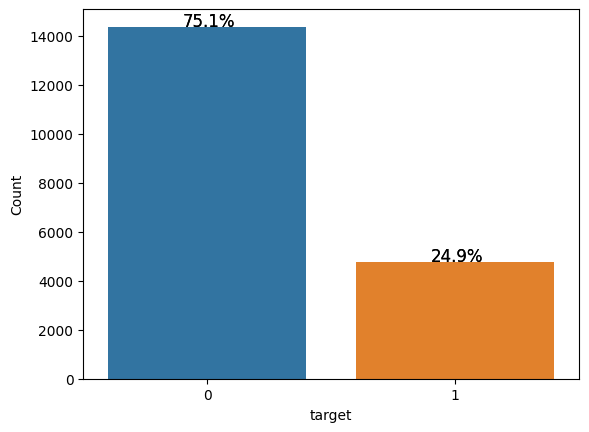

In [194]:
#Handling Imbalance data
sns.countplot(x=train_data_mean["target"])
ax=sns.countplot(x='target', data=train_data_mean)
plt.xlabel('target')
plt.ylabel('Count')
total = len(train_data_mean)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 10
    ax.annotate(percentage, (x, y), size=12)
plt.show()

In [195]:
x = train_data_mean.drop(['enrollee_id', 'target','city'], axis = 1)
y = train_data_mean['target']

In [196]:
from imblearn.over_sampling import SMOTE

smote =SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)
y_sm.value_counts()

1    14378
0    14378
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

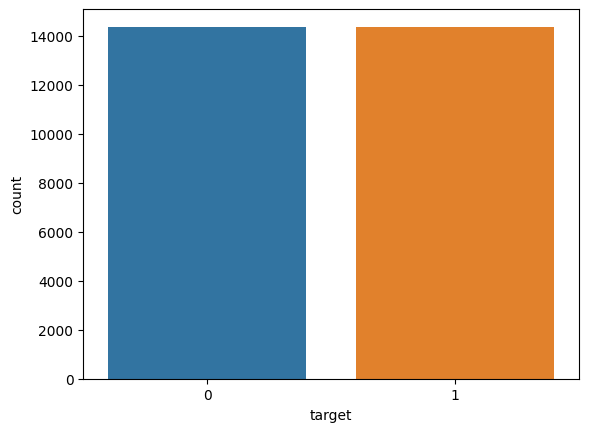

In [197]:
sns.countplot(x=y_sm)

In [198]:
#Train & Test split
from sklearn.model_selection import train_test_split,cross_val_score

x_train, x_test , y_train, y_test =train_test_split(x_sm, y_sm, test_size=0.25, random_state=42 , stratify=y_sm)

print(y_train.value_counts())
print(y_test.value_counts())

1    10784
0    10783
Name: target, dtype: int64
0    3595
1    3594
Name: target, dtype: int64


In [199]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Machine Learning Model

### 3.1 KNN

In [200]:
knnc = KNeighborsClassifier(n_neighbors=4)
knnc.fit(x_train, y_train)
y_pred_knnc = knnc.predict(x_test)
knnc_accuracy = accuracy_score(y_test,knnc.predict(x_test))

print(classification_report(y_test, y_pred_knnc))
print("Accuracy score of KNN : {:.2f}".format(accuracy_score(y_pred_knnc,y_test)))
print("Precision score of KNN: {:.2f}".format(precision_score(y_pred_knnc,y_test,zero_division = True)))
print("F1 score of KNN: {:.2f}".format(f1_score(y_pred_knnc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      3595
           1       0.79      0.70      0.74      3594

    accuracy                           0.76      7189
   macro avg       0.76      0.76      0.76      7189
weighted avg       0.76      0.76      0.76      7189

Accuracy score of KNN : 0.76
Precision score of KNN: 0.70
F1 score of KNN: 0.74


In [201]:
# Calculate accuracy, precision, and F1 score for each class
accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred_knnc[y_test == 0])
accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred_knnc[y_test == 1])

# Display results
print("Accuracy for Class 0: {:.2f}".format(accuracy_class_0))
print("Accuracy for Class 1: {:.2f}".format(accuracy_class_1))

Accuracy for Class 0: 0.81
Accuracy for Class 1: 0.70


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

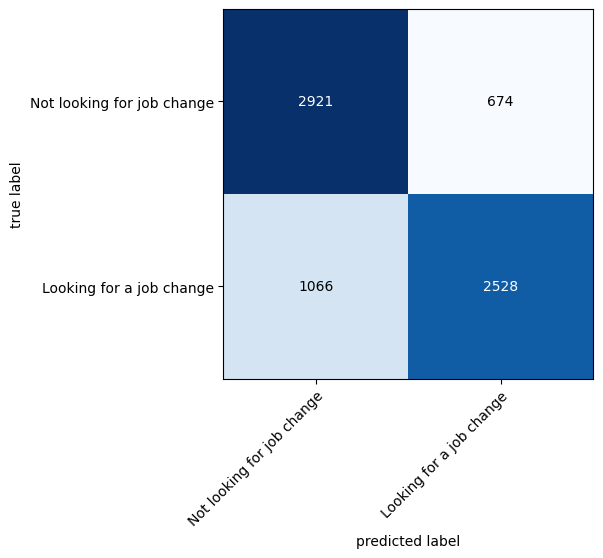

In [202]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
ev = confusion_matrix(y_test , knnc.predict(x_test))
ev
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(ev , class_names=["Not looking for job change","Looking for a job change"])

In [203]:
knnc = KNeighborsClassifier(n_neighbors=5)
knnc.fit(x_train, y_train)
y_pred_knnc = knnc.predict(x_test)
knnc_accuracy = accuracy_score(y_test,knnc.predict(x_test))

print(classification_report(y_test, y_pred_knnc))
print("Accuracy score of KNN : {:.2f}".format(accuracy_score(y_pred_knnc,y_test)))
print("Precision score of KNN: {:.2f}".format(precision_score(y_pred_knnc,y_test,zero_division = True)))
print("F1 score of KNN: {:.2f}".format(f1_score(y_pred_knnc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      3595
           1       0.75      0.80      0.78      3594

    accuracy                           0.77      7189
   macro avg       0.77      0.77      0.77      7189
weighted avg       0.77      0.77      0.77      7189

Accuracy score of KNN : 0.77
Precision score of KNN: 0.80
F1 score of KNN: 0.78


In [204]:
# Calculate accuracy, precision, and F1 score for each class
accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred_knnc[y_test == 0])
accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred_knnc[y_test == 1])

# Display results
print("Accuracy for Class 0: {:.2f}".format(accuracy_class_0))
print("Accuracy for Class 1: {:.2f}".format(accuracy_class_1))

Accuracy for Class 0: 0.74
Accuracy for Class 1: 0.80


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

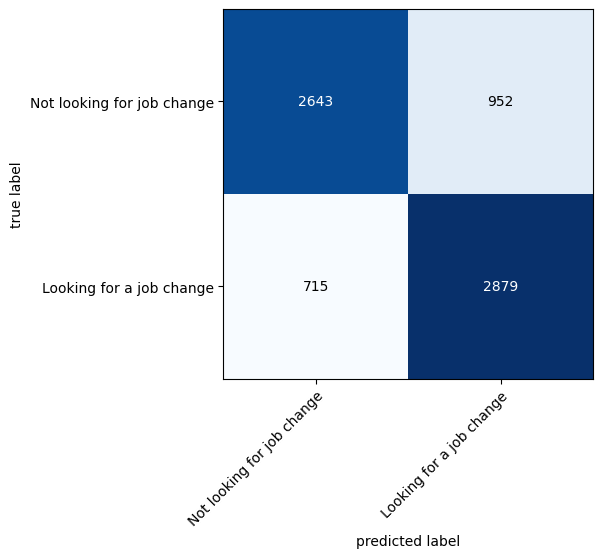

In [205]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
ev = confusion_matrix(y_test , knnc.predict(x_test))
ev
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(ev , class_names=["Not looking for job change","Looking for a job change"])

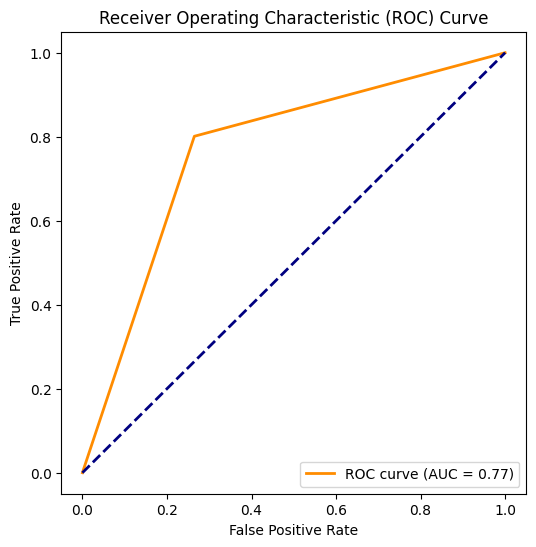

In [206]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_knnc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Model Complexity:   

KNN with a lower number of neighbors tends to have a more complex decision boundary. When you decrease the number of neighbors, the model becomes more sensitive to noise in the data.
Increasing the number of neighbors (e.g., from 4 to 5) can make the decision boundary smoother and more robust. It might help reduce the impact of outliers or noisy data points.
Overfitting:

With a small number of neighbors (e.g., 4), the model may be overly influenced by individual data points, leading to overfitting. Overfitting occurs when the model learns noise in the training data rather than the underlying pattern.
Increasing the number of neighbors can mitigate overfitting by making the model generalize better to new, unseen data.
Data Distribution:

The optimal value for n_neighbors depends on the distribution of your data. In some cases, a higher number of neighbors might capture the underlying patterns more effectively, especially if the data is noisy or has complex decision boundaries.
Dataset Size:

The size of your dataset can also influence the performance of KNN. With a larger dataset, a higher value of n_neighbors might be beneficial for creating a more stable and generalized model.
Randomness in the Data:

The KNeighborsClassifier uses the majority class among the k-nearest neighbors to make predictions. In some cases, random fluctuations in the data or the specific composition of the neighbors might lead to differences in performance.
To gain a better understanding, you could perform further analysis, such as cross-validation, to evaluate the model's performance with different values of n_neighbors. This can help you identify the optimal parameter for your specific dataset and problem.

### 3.2 Logistic Regression model

In [207]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2' , C=0.5)

In [208]:
#Cross Validation
from sklearn.model_selection import KFold , cross_val_score

K_fold = KFold(n_splits=10 , shuffle= True , random_state= 42)

scoring = "accuracy"
score = cross_val_score(lr , x,y, cv= K_fold , scoring=scoring )

print (score)
round(np.mean(score)*100 , 2)

[0.77244259 0.77244259 0.76826722 0.75104384 0.75939457 0.75822454
 0.75822454 0.76814621 0.75561358 0.75770235]


76.22

In [209]:
lr.fit(x_train , y_train )

print ('Train Score =>',lr.score(x_train , y_train ))
print ('Test Score =>',lr.score(x_test , y_test ))
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr.predict(x_test))
print(classification_report(y_test, y_pred_lr))
print("Accuracy score of Logistic Regression : {:.2f}".format(accuracy_score(y_pred_lr,y_test)))
print("Precision score of Logistic Regression : {:.2f}".format(precision_score(y_pred_lr,y_test,zero_division = True)))
print("F1 score of Logistic Regression : {:.2f}".format(f1_score(y_pred_lr,y_test,zero_division=True)))

Train Score => 0.7320443269810358
Test Score => 0.7366810404785088
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3595
           1       0.74      0.74      0.74      3594

    accuracy                           0.74      7189
   macro avg       0.74      0.74      0.74      7189
weighted avg       0.74      0.74      0.74      7189

Accuracy score of Logistic Regression : 0.74
Precision score of Logistic Regression : 0.74
F1 score of Logistic Regression : 0.74


In [210]:
#Evaluation of Logistic Regression model
!pip install mlxtend

In [211]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,f1_score
ev = confusion_matrix(y_test , lr.predict(x_test))
ev

array([[2648,  947],
       [ 946, 2648]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

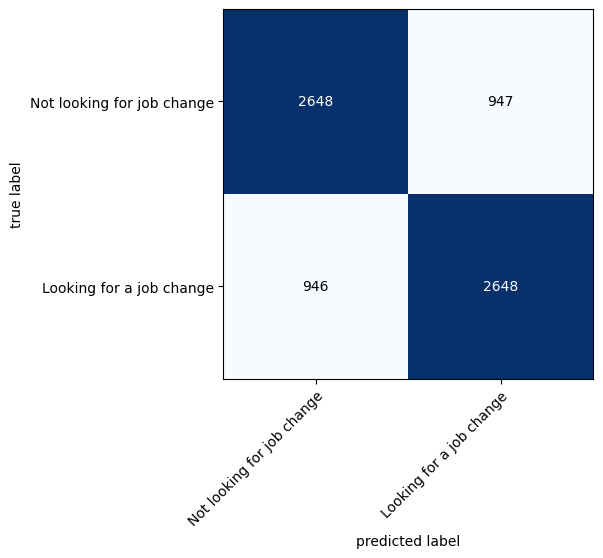

In [212]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(ev , class_names=["Not looking for job change","Looking for a job change"])

In [213]:
print (classification_report(y_test  , lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3595
           1       0.74      0.74      0.74      3594

    accuracy                           0.74      7189
   macro avg       0.74      0.74      0.74      7189
weighted avg       0.74      0.74      0.74      7189



In [214]:
# Calculate accuracy, precision, and F1 score for each class
accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred_lr[y_test == 0])
accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred_lr[y_test == 1])

# Display results
print("Accuracy for Class 0: {:.2f}".format(accuracy_class_0))
print("Accuracy for Class 1: {:.2f}".format(accuracy_class_1))

Accuracy for Class 0: 0.74
Accuracy for Class 1: 0.74


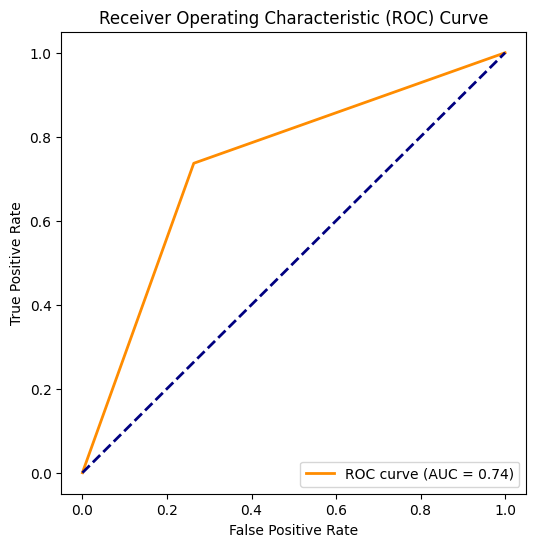

In [215]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 3.3 Decision tree model

In [216]:
from sklearn.tree import DecisionTreeClassifier

x_train, x_test , y_train, y_test =train_test_split(x_sm, y_sm, test_size=0.25, random_state=42 , stratify=y_sm)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [217]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)

print (dt.score(x_train,y_train))
print (dt.score(x_test,y_test))

0.7916724625585385
0.777855056336069


In [218]:
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt.predict(x_test))
print(classification_report(y_test, y_pred_dt))
print("Accuracy score of Decision Tree : {:.2f}".format(accuracy_score(y_pred_dt,y_test)))
print("Precision score of Decision Tree : {:.2f}".format(precision_score(y_pred_dt,y_test,zero_division = True)))
print("F1 score of Decision Tree : {:.2f}".format(f1_score(y_pred_dt,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      3595
           1       0.75      0.83      0.79      3594

    accuracy                           0.78      7189
   macro avg       0.78      0.78      0.78      7189
weighted avg       0.78      0.78      0.78      7189

Accuracy score of Decision Tree : 0.78
Precision score of Decision Tree : 0.83
F1 score of Decision Tree : 0.79


In [219]:
# Calculate accuracy, precision, and F1 score for each class
accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred_dt[y_test == 0])
accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred_dt[y_test == 1])

# Display results
print("Accuracy for Class 0: {:.2f}".format(accuracy_class_0))
print("Accuracy for Class 1: {:.2f}".format(accuracy_class_1))

Accuracy for Class 0: 0.72
Accuracy for Class 1: 0.83


              precision    recall  f1-score   support

           0       0.81      0.72      0.76      3595
           1       0.75      0.83      0.79      3594

    accuracy                           0.78      7189
   macro avg       0.78      0.78      0.78      7189
weighted avg       0.78      0.78      0.78      7189



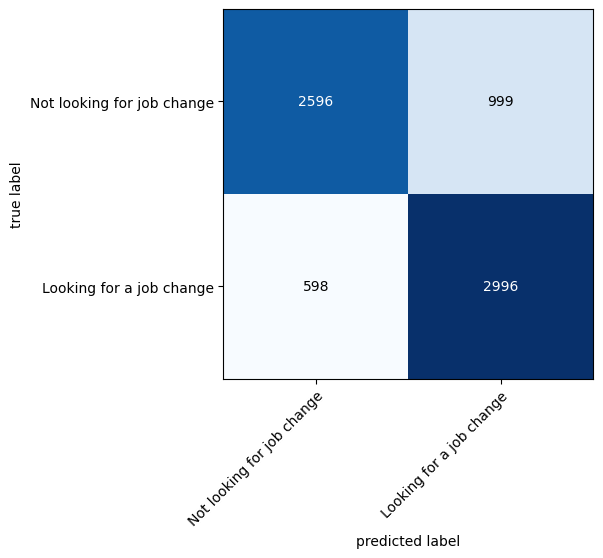

In [220]:
ev2 = confusion_matrix(y_test , dt.predict(x_test))
ev2

plot_confusion_matrix(ev2 , class_names=["Not looking for job change","Looking for a job change"])

print (classification_report(y_test  , dt.predict(x_test)))

Best: 0.789539 using {'max_depth': 9, 'max_features': 10}
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      3595
           1       0.76      0.84      0.80      3594

    accuracy                           0.79      7189
   macro avg       0.79      0.79      0.79      7189
weighted avg       0.79      0.79      0.79      7189



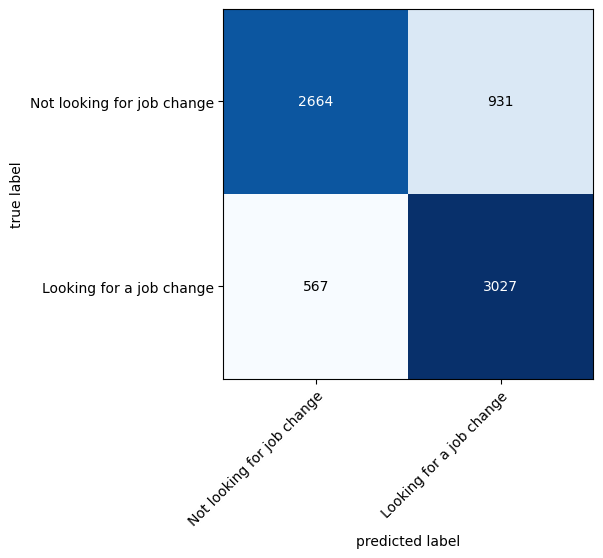

In [221]:
#grid Search for decision tree
from sklearn.model_selection import GridSearchCV

x_train, x_test , y_train, y_test =train_test_split(x_sm, y_sm, test_size=0.25, random_state=42 , stratify=y_sm)


param_grid = {"max_depth": [3,5,7,8,9,10] ,"max_features":[3,5,7,8,9,10]}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator= dt , param_grid=param_grid , cv = 5)
grid_search.fit(x_train,y_train)

print ("Best: %f using %s" %(grid_search.best_score_, grid_search.best_params_))

ev3 = confusion_matrix(y_test , grid_search.predict(x_test))
ev3

plot_confusion_matrix(ev3 , class_names=["Not looking for job change","Looking for a job change"])

print (classification_report(y_test  , grid_search.predict(x_test)))

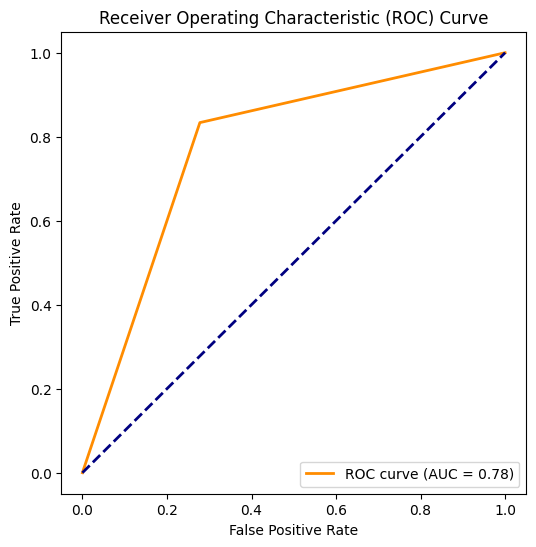

In [222]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 3.4 Random forest classifier use grid search

In [223]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50, class_weight = {0:1, 1:4})
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc.predict(x_test))

print(classification_report(y_test, y_pred_rfc))
print("Accuracy score of Random forest : {:.2f}".format(accuracy_score(y_pred_rfc,y_test)))
print("Precision score of Random forest : {:.2f}".format(precision_score(y_pred_rfc,y_test,zero_division = True)))
print("F1 score of Random forest : {:.2f}".format(f1_score(y_pred_rfc,y_test,zero_division=True)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3595
           1       0.82      0.82      0.82      3594

    accuracy                           0.82      7189
   macro avg       0.82      0.82      0.82      7189
weighted avg       0.82      0.82      0.82      7189

Accuracy score of Random forest : 0.82
Precision score of Random forest : 0.82
F1 score of Random forest : 0.82


In [224]:
# Calculate accuracy, precision, and F1 score for each class
accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred_rfc[y_test == 0])
accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred_rfc[y_test == 1])

# Display results
print("Accuracy for Class 0: {:.2f}".format(accuracy_class_0))
print("Accuracy for Class 1: {:.2f}".format(accuracy_class_1))

Accuracy for Class 0: 0.82
Accuracy for Class 1: 0.82


              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3595
           1       0.82      0.82      0.82      3594

    accuracy                           0.82      7189
   macro avg       0.82      0.82      0.82      7189
weighted avg       0.82      0.82      0.82      7189



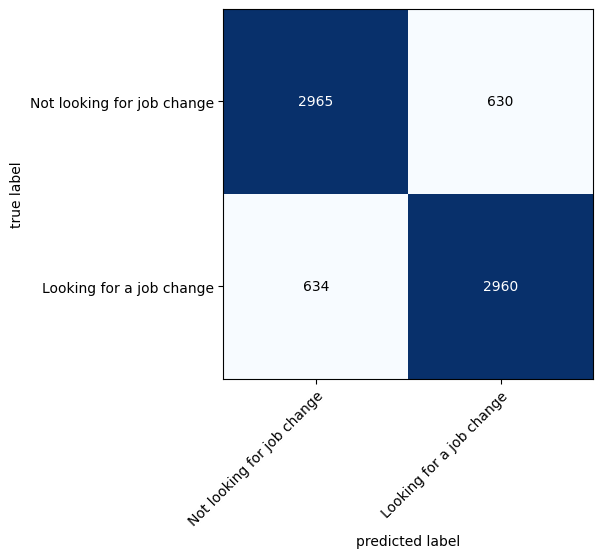

In [225]:
ev4 = confusion_matrix(y_test , rfc.predict(x_test))
ev4

plot_confusion_matrix(ev4 , class_names=["Not looking for job change","Looking for a job change"])

print (classification_report(y_test  , rfc.predict(x_test)))

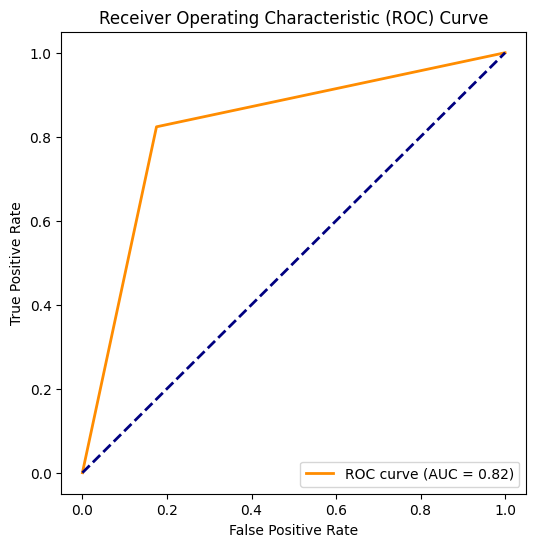

In [226]:
y_pred_rfc = rfc.predict(x_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_rfc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### comparison

In [227]:
accuracies = {"KNN Accuracy":knnc_accuracy, "Logistic Regression Accuracy": lr_accuracy, "Decision Tree Accuracy":dt_accuracy,  "Random Forest Accuracy":rfc_accuracy}
print("The best score has the model: ", max(accuracies, key=accuracies.get))

The best score has the model:  Random Forest Accuracy


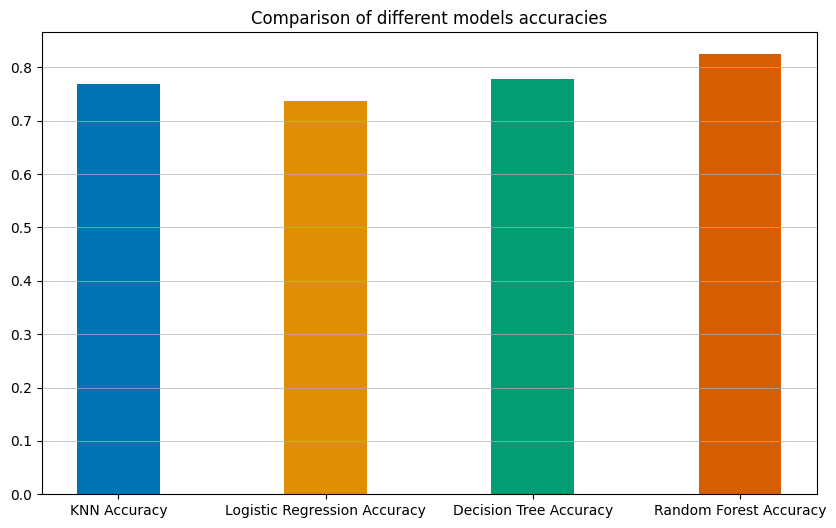

In [228]:
colorblind_palette = sns.color_palette("colorblind")

plt.figure(figsize=(10,6))
plt.bar(*zip(*accuracies.items()), color=colorblind_palette, width = 0.4)
plt.title("Comparison of different models accuracies")
plt.grid(axis = 'y', linewidth = 0.5)
plt.show()